In [1]:
# ignoring some warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [3]:
df = pd.read_csv('Patients_Dataset.csv')
df.head()

,id,name,gender,age,weight_kg,height_cm,education,marital,income,insurance,...,insulin,iron,u_acid,s_cotinine,cpk,ldh,fvc,fev1,fev1_fvc_ratio,memory
0,62632,Samual Sipes,male,29.0,168.0,186.0,preparatory,never married,5.0,no,...,106.48,63.0,7.2,159.000,251.0,170.0,5426.0,4434.0,0.817177,NaN
1,63150,Beau Dach,male,19.0,90.0,200.0,NaN,NaN,15.0,yes,...,NaN,83.0,7.3,14.700,99.0,102.0,7175.0,5786.0,0.806411,NaN
2,71366,Youlanda Metz,female,20.0,75.0,174.0,college or equivalent,never married,3.0,yes,...,NaN,118.0,4.1,0.011,211.0,142.0,5120.0,4570.0,0.892578,NaN
3,63734,Deandre Walsh,male,43.0,102.0,181.0,college or equivalent,divorced,2.0,no,...,NaN,55.0,4.7,0.766,312.0,109.0,NaN,NaN,NaN,NaN
4,65619,Rhett Douglas,male,20.0,91.0,170.0,secondary or equivalent,never married,8.0,no,...,NaN,62.0,5.7,0.376,163.0,123.0,3870.0,3297.0,0.851938,NaN


In [4]:
df.drop(['name'], axis=True, inplace=True)

In [6]:
df.columns

Index(['id', 'gender', 'age', 'weight_kg', 'height_cm', 'education', 'marital',
       'income', 'insurance', 'gen_health', 'smoker', 'days_active', 'bmi',
       'waist_cm', 'drinks_day', 'asthma', 'chf', 'cad', 'mi', 'cva', 'copd',
       'cancer', 'hypertension', 'diabetes', 'pulse', 'sys_bp', 'dia_bp',
       'medicines', 'wbc', 'hgb', 'hct', 'platelets', 'alt', 'ast', 'alk_phos',
       'bun', 'cr', 'sodium', 'potassium', 'chloride', 'bicarb', 'ca', 'phos',
       't_bilirubin', 'alb', 't_protein', 'glob', 'glucose', 'glucose.1',
       'alb_cr_ratio', 'trigs', 't_chol', 'hdl', 'ldl_chol', 'a1c', 'insulin',
       'iron', 'u_acid', 's_cotinine', 'cpk', 'ldh', 'fvc', 'fev1',
       'fev1_fvc_ratio', 'memory'],
      dtype='object')

In [7]:
cols = ['id', 'gender', 'age', 'weight_kg', 'height_cm', 'education', 'marital',
       'income', 'insurance', 'gen_health', 'smoker', 'days_active', 'bmi',
       'waist_cm', 'drinks_day', 'asthma', 'chf', 'cad', 'mi', 'cva', 'copd',
       'cancer', 'hypertension', 'diabetes', 'pulse', 'sys_bp', 'dia_bp']
df = df[cols]

In [8]:
df.head()

,id,gender,age,weight_kg,height_cm,education,marital,income,insurance,gen_health,...,cad,mi,cva,copd,cancer,hypertension,diabetes,pulse,sys_bp,dia_bp
0,62632,male,29.0,168.0,186.0,preparatory,never married,"$20k to $24,999",no,excellent,...,no,no,no,no,no,unknown,no,NaN,110.0,80.0
1,63150,male,19.0,90.0,200.0,unknown,unknown,$100k and Over,yes,excellent,...,unknown,unknown,unknown,unknown,unknown,no,no,NaN,106.0,68.0
2,71366,female,20.0,75.0,174.0,college or equivalent,never married,"$10k to $14,999",yes,very good,...,no,no,no,no,no,no,no,NaN,112.0,54.0
3,63734,male,43.0,102.0,181.0,college or equivalent,divorced,"$5k to $9,999",no,fair,...,yes,yes,no,no,no,yes,yes,NaN,130.0,66.0
4,65619,male,20.0,91.0,170.0,secondary or equivalent,never married,"$45k to $54,999",no,good,...,no,no,yes,no,no,no,no,NaN,104.0,64.0


In [9]:
df.shape

(7821, 27)

# Data wrangling

## 1- replacing null cells in categorical features with unknown:

In [5]:
#gender
df['gender'][df.gender.isna()] = 'unknown'

#education
df['education'][df.education.isna()] = 'unknown'

#marital
df['marital'][df.marital.isna()] = 'unknown'

# income
df['income'][df.income.isna()] = 'unknown'
df['income'][df.income == 1] = '$0 to $4,999'
df['income'][df.income == 2] = '$5k to $9,999'
df['income'][df.income == 3] = '$10k to $14,999'
df['income'][df.income == 4] = '$15k to $19,999'
df['income'][df.income == 5] = '$20k to $24,999'
df['income'][df.income == 6] = '$25k to $34,999'
df['income'][df.income == 7] = '$35k to $44,999'
df['income'][df.income == 8] = '$45k to $54,999'
df['income'][df.income == 9] = '$55k to $64,999'
df['income'][df.income == 10] = '$65k to $74,999'
df['income'][df.income == 14] = '$75k to $99,999'
df['income'][df.income == 15] = '$100k and Over'

#insurance
df['insurance'][df.insurance.isna()] = 'unknown'

#gen_health
df['gen_health'][df.gen_health.isna()] = 'unknown'

#smoker
df['smoker'][df.smoker.isna()] = 'unknown'

#days_active
df['days_active'][df.days_active == 0.0] = '0'
df['days_active'][df.days_active == 1.0] = '1'
df['days_active'][df.days_active == 2.0] = '2'
df['days_active'][df.days_active == 3.0] = '3'
df['days_active'][df.days_active == 4.0] = '4'
df['days_active'][df.days_active == 5.0] = '5'
df['days_active'][df.days_active == 6.0] = '6'
df['days_active'][df.days_active == 7.0] = '7'
df['days_active'][df.days_active.isna()] = 'unknown'

#asthma
df['asthma'][df.asthma.isna()] = 'unknown'

#chf
df['chf'][df.chf.isna()] = 'unknown'

#cad
df['cad'][df.cad.isna()] = 'unknown'

#mi
df['mi'][df.mi.isna()] = 'unknown'

#cva
df['cva'][df.cva.isna()] = 'unknown'

#copd
df['copd'][df.copd.isna()] = 'unknown'

#cancer
df['cancer'][df.cancer.isna()] = 'unknown'

#  hypertension
df['hypertension'][df.hypertension.isna()] = 'unknown'

#diabetes
df['diabetes'][df.diabetes.isna()] = 'unknown'


## 2- Changing categorical ordinal data to type categoricalDtype:

In [10]:
#gender
Gend_levels = ['female', 'male', 'unknown']
gend_levels = pd.api.types.CategoricalDtype(ordered=True, categories=Gend_levels)
df.gender = df.gender.astype(gend_levels)

#education
Edu_levels = ['postgraduate education', 'college or equivalent', 'secondary or equivalent',
             'preparatory', 'less than preparatory', 'unknown']
edu_levels = pd.api.types.CategoricalDtype(ordered=True, categories=Edu_levels)
df.education = df.education.astype(edu_levels)

#marital
Mari_levels = ['married', 'widowed', 'divorced', 'separated', 'never married', 'unknown']
mari_levels = pd.api.types.CategoricalDtype(ordered=True, categories=Mari_levels)
df.marital = df.marital.astype(mari_levels)

#income
Incm_levels = ['unknown', '$0 to $4,999', '$5k to $9,999', '$10k to $14,999', '$15k to $19,999', 
               '$20k to $24,999','$25k to $34,999', '$35k to $44,999', '$45k to $54,999', 
               '$55k to $64,999', '$65k to $74,999', '$75k to $99,999', '$100k and Over']
incm_levels = pd.api.types.CategoricalDtype(ordered=True, categories=Incm_levels)
df.income = df.income.astype(incm_levels)

#insurance
Insur_levels = ['yes', 'no', 'unknown']
insur_levels = pd.api.types.CategoricalDtype(ordered=True, categories=Insur_levels)
df.insurance = df.insurance.astype(insur_levels)

#gen_health
Genh_levels = ['excellent', 'very good', 'good', 'fair', 'poor', 'unknown']
genh_levels = pd.api.types.CategoricalDtype(ordered=True, categories=Genh_levels)
df.gen_health = df.gen_health.astype(genh_levels)

#smoker
Smok_levels = ['yes', 'no', 'unknown']
smok_levels = pd.api.types.CategoricalDtype(ordered=True, categories=Smok_levels)
df.smoker = df.smoker.astype(smok_levels)

#days_active
Dact_levels = ['0', '1', '2', '3', '4', '5', '6', '7', 'unknown']
dact_levels = pd.api.types.CategoricalDtype(ordered=True, categories=Dact_levels)
df.days_active = df.days_active.astype(dact_levels)

#asthma
Asthma_levels = ['yes', 'no', 'unknown']
asthma_levels = pd.api.types.CategoricalDtype(ordered=True, categories=Asthma_levels)
df.asthma = df.asthma.astype(asthma_levels)

#chf
Chf_levels = ['yes', 'no', 'unknown']
chf_levels = pd.api.types.CategoricalDtype(ordered=True, categories=Chf_levels)
df.chf = df.chf.astype(chf_levels)

#cad
Cad_levels = ['yes', 'no', 'unknown']
cad_levels = pd.api.types.CategoricalDtype(ordered=True, categories=Cad_levels)
df.cad = df.cad.astype(cad_levels)

#mi
Mi_levels = ['yes', 'no', 'unknown']
mi_levels = pd.api.types.CategoricalDtype(ordered=True, categories=Mi_levels)
df.mi = df.mi.astype(mi_levels)

#cva
Cva_levels = ['yes', 'no', 'unknown']
cva_levels = pd.api.types.CategoricalDtype(ordered=True, categories=Cva_levels)
df.cva = df.cva.astype(cva_levels)

#copd
Copd_levels = ['yes', 'no', 'unknown']
copd_levels = pd.api.types.CategoricalDtype(ordered=True, categories=Copd_levels)
df.copd = df.copd.astype(copd_levels)

#cancer
Cancer_levels = ['yes', 'no', 'unknown']
cancer_levels = pd.api.types.CategoricalDtype(ordered=True, categories=Cancer_levels)
df.cancer = df.cancer.astype(cancer_levels)

#hypertension
Hypertension_levels = ['yes', 'no', 'hypotension', 'unknown']
hypertension_levels = pd.api.types.CategoricalDtype(ordered=True, categories=Hypertension_levels)
df.hypertension = df.hypertension.astype(hypertension_levels)

#diabetes
Diabetes_levels = ['yes', 'borderline', 'no', 'unknown']
diabetes_levels = pd.api.types.CategoricalDtype(ordered=True, categories=Diabetes_levels)
df.diabetes = df.diabetes.astype(diabetes_levels)

## 3- Clearing all wrong entries in the numerical features of the data

### 1- personal data

In [11]:
# nulling all bmi cells with value greater than 110 or less than 12
df['bmi'][df.bmi > 110] = np.nan
df['bmi'][df.bmi < 12] = np.nan

# nulling all waist_cm cells with value greater than 180 or less than 30
df['waist_cm'][df.waist_cm > 180] = np.nan
df['waist_cm'][df.waist_cm < 30] = np.nan

# nulling all drinks_day cells with value greater than 100 or less than 0
df['drinks_day'][df.drinks_day > 100] = np.nan
df['drinks_day'][df.drinks_day < 0] = np.nan

# nulling all weight_kg cells with value greater than 210 or less than 40
df['weight_kg'][df.weight_kg > 250] = np.nan
df['weight_kg'][df.weight_kg < 0] = np.nan

# nulling all height_cm cells with value greater than 210 or less than 40
df['height_cm'][df.height_cm > 210] = np.nan
df['height_cm'][df.height_cm < 40] = np.nan

### 2- heart rate and blood pressures

In [12]:
# nulling heart rate (pulse) cells with values more 140 or less than 30
df['pulse'][df.pulse > 140] = np.nan
df['pulse'][df.pulse < 30] = np.nan

# nulling blood pressure(sys_bp) cells with values more 250 or less than 65
df['sys_bp'][df.sys_bp > 250] = np.nan
df['sys_bp'][df.sys_bp < 65] = np.nan

# nulling blood pressure(dia_bp) cells with values more 150 or less than 40
df['dia_bp'][df.dia_bp > 150] = np.nan
df['dia_bp'][df.dia_bp < 40] = np.nan


# hypertension and pressure values
# First, we depend on the correct pressure values
df['hypertension'][(df.sys_bp >= 120) &(df.dia_bp >=80)] = 'yes'
df['hypertension'][(df.sys_bp < 120) & (df.sys_bp >= 90) &(df.dia_bp < 80) &(df.dia_bp >=60)] = 'no'
df['hypertension'][(df.sys_bp < 90) &(df.dia_bp < 60)] = 'hypotension'


right_hyper_ids = df['id'][((df.sys_bp >= 120) &(df.dia_bp >=80)) | 
                           ((df.sys_bp < 90) &(df.dia_bp < 60)) | 
                           ((df.sys_bp < 120) & (df.sys_bp >= 90) &(df.dia_bp < 80) &(df.dia_bp >=60))]

df['sys_bp'][~(df.id.isin(right_hyper_ids))] = np.nan
df['dia_bp'][~(df.id.isin(right_hyper_ids))] = np.nan

# Diseases and personal data Analytics:
## only bivariate and multivariate visuals

### diseases by gender

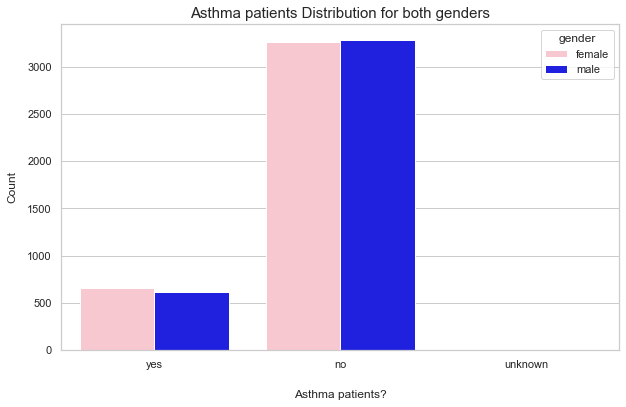

In [18]:
sb.set_theme(style='whitegrid')
plt.figure(figsize=[10, 6])

ax = sb.countplot(data=df, x='asthma', hue='gender', hue_order=['female', 'male'], 
             palette=['pink', 'blue'])

plt.xticks(rotation=0)
plt.title("Asthma patients Distribution for both genders", fontsize= 15)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Asthma patients?', labelpad=20);

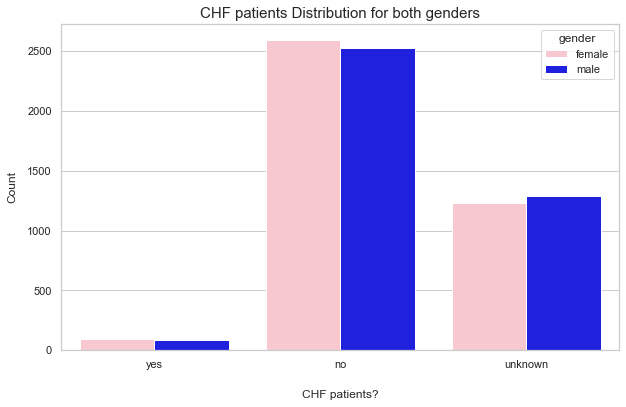

In [19]:
sb.set_theme(style='whitegrid')
plt.figure(figsize=[10, 6])

sb.countplot(data=df, x='chf', hue='gender', hue_order=['female', 'male'], 
             palette=['pink', 'blue'])

plt.xticks(rotation=0)
plt.title("CHF patients Distribution for both genders", fontsize= 15)
plt.ylabel('Count', labelpad=10)
plt.xlabel('CHF patients?', labelpad=20);

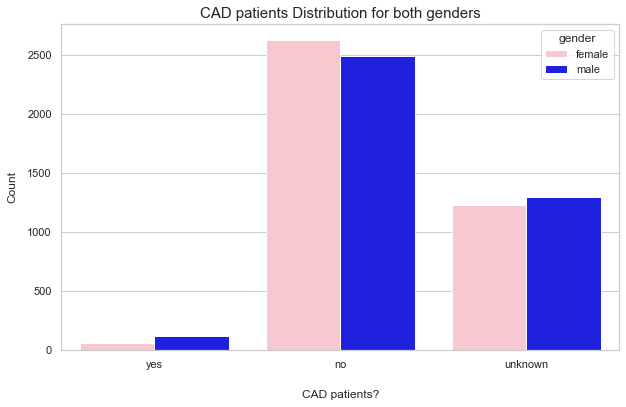

In [20]:
sb.set_theme(style='whitegrid')
plt.figure(figsize=[10, 6])

sb.countplot(data=df, x='cad', hue='gender', hue_order=['female', 'male'], 
             palette=['pink', 'blue'])

plt.xticks(rotation=0)
plt.title("CAD patients Distribution for both genders", fontsize= 15)
plt.ylabel('Count', labelpad=10)
plt.xlabel('CAD patients?', labelpad=20);

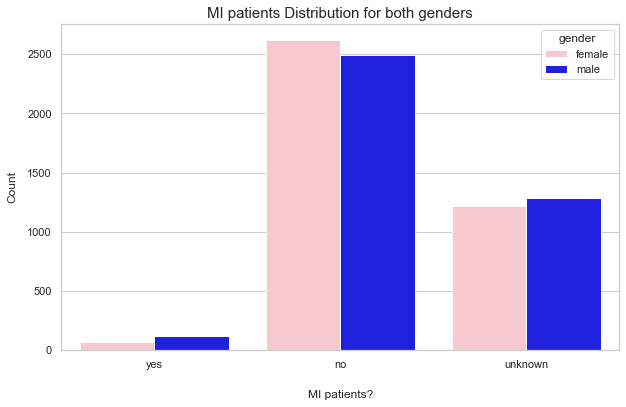

In [21]:
sb.set_theme(style='whitegrid')
plt.figure(figsize=[10, 6])

sb.countplot(data=df, x='mi', hue='gender', hue_order=['female', 'male'], 
             palette=['pink', 'blue'])

plt.xticks(rotation=0)
plt.title("MI patients Distribution for both genders", fontsize= 15)
plt.ylabel('Count', labelpad=10)
plt.xlabel('MI patients?', labelpad=20);

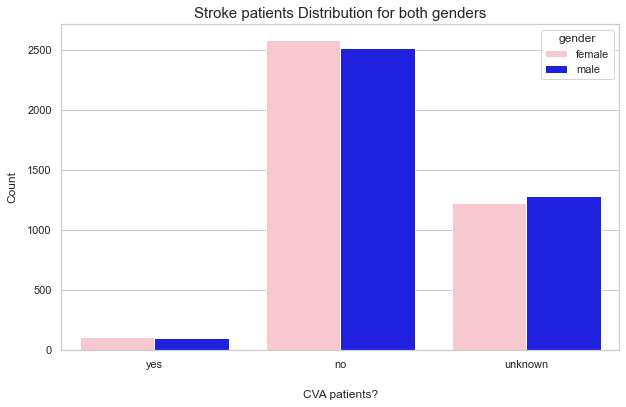

In [23]:
sb.set_theme(style='whitegrid')
plt.figure(figsize=[10, 6])

sb.countplot(data=df, x='cva', hue='gender', hue_order=['female', 'male'], 
             palette=['pink', 'blue'])

plt.xticks(rotation=0)
plt.title("Stroke patients Distribution for both genders", fontsize= 15)
plt.ylabel('Count', labelpad=10)
plt.xlabel('CVA patients?', labelpad=20);


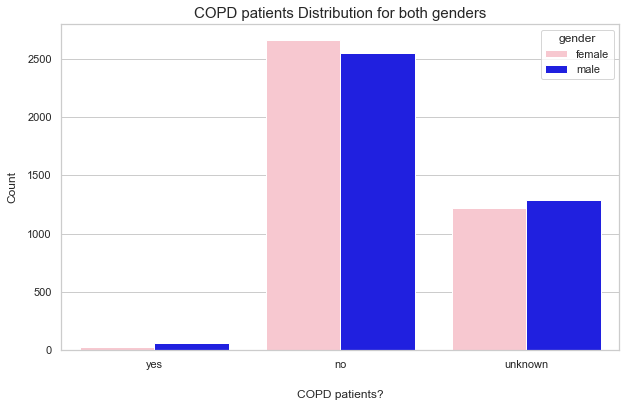

In [24]:
plt.figure(figsize=[10, 6])

sb.countplot(data=df, x='copd', hue='gender', hue_order=['female', 'male'], 
             palette=['pink', 'blue'])

plt.xticks(rotation=0)
plt.title("COPD patients Distribution for both genders", fontsize= 15)
plt.ylabel('Count', labelpad=10)
plt.xlabel('COPD patients?', labelpad=20);


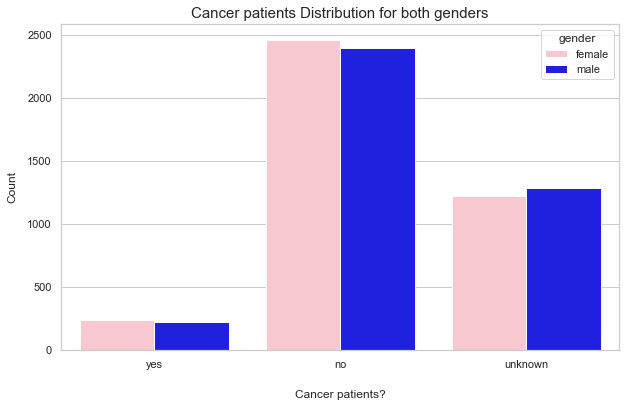

In [25]:
plt.figure(figsize=[10, 6])

sb.countplot(data=df, x='cancer', hue='gender', hue_order=['female', 'male'], 
             palette=['pink', 'blue'])

plt.xticks(rotation=0)
plt.title("Cancer patients Distribution for both genders", fontsize= 15)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Cancer patients?', labelpad=20);

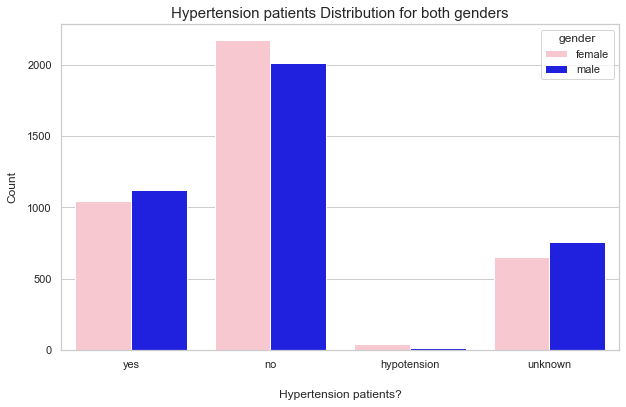

In [26]:
plt.figure(figsize=[10, 6])

sb.countplot(data=df, x='hypertension', hue='gender', hue_order=['female', 'male'], 
             palette=['pink', 'blue'])

plt.xticks(rotation=0)
plt.title("Hypertension patients Distribution for both genders", fontsize= 15)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Hypertension patients?', labelpad=20);

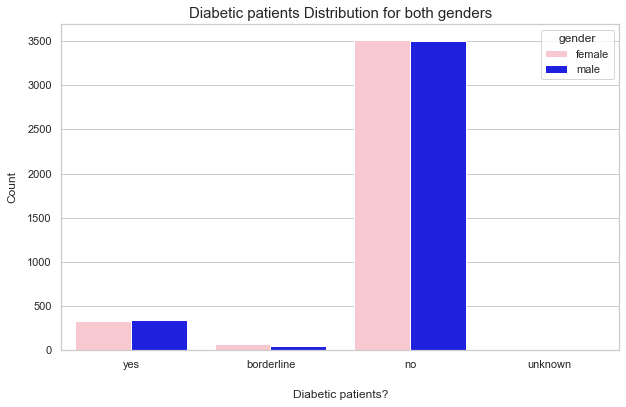

In [27]:
plt.figure(figsize=[10, 6])

sb.countplot(data=df, x='diabetes', hue='gender', hue_order=['female', 'male'], 
             palette=['pink', 'blue'])

plt.xticks(rotation=0)
plt.title("Diabetic patients Distribution for both genders", fontsize= 15)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Diabetic patients?', labelpad=20);

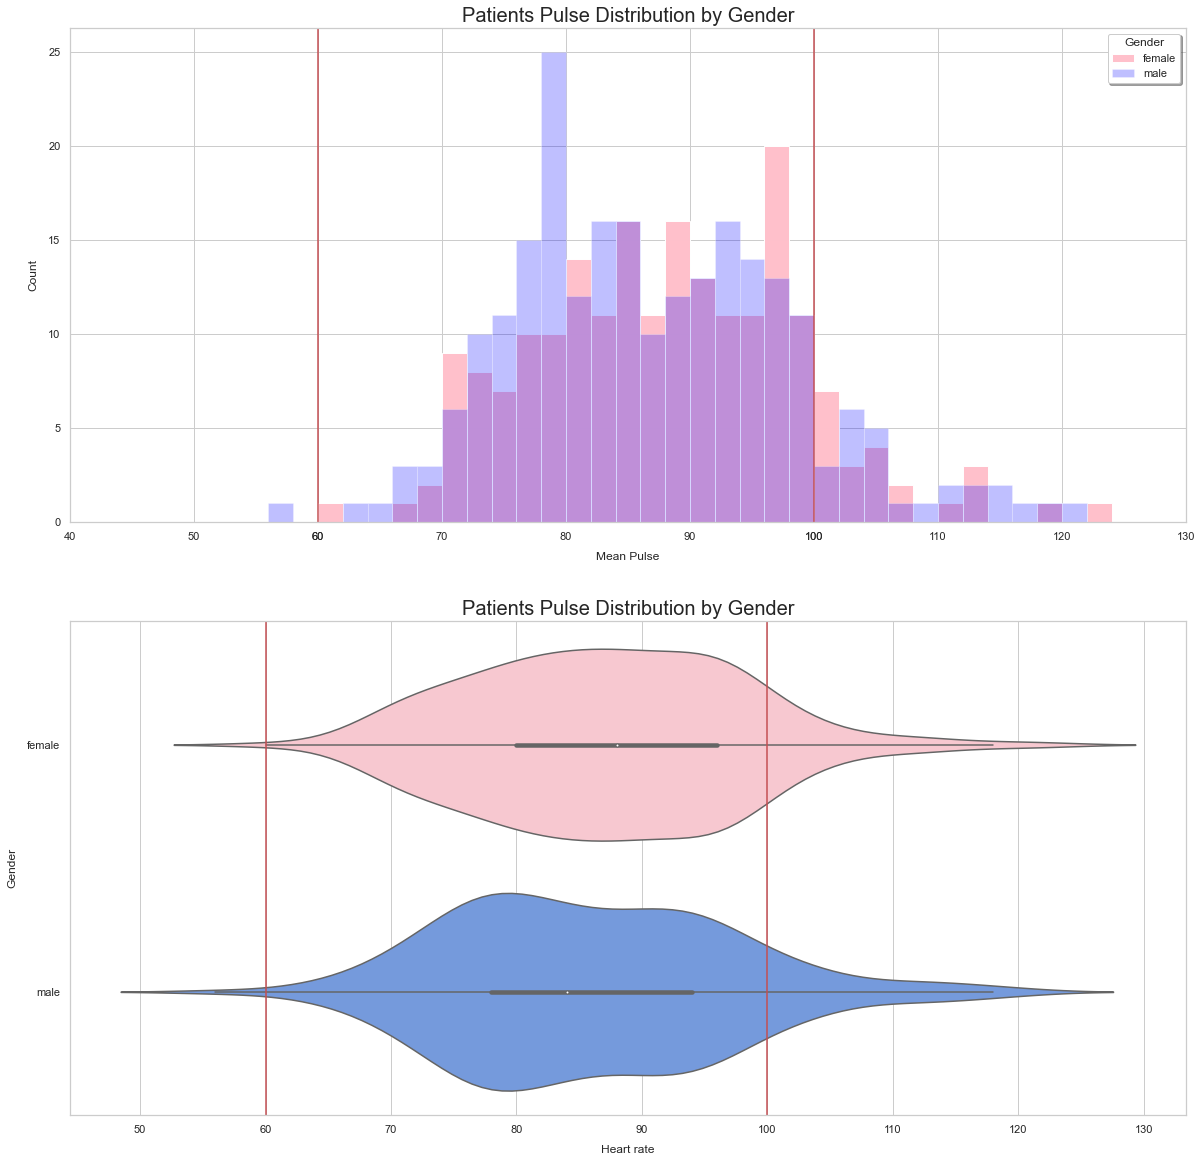

In [28]:
plt.figure(figsize=[20, 20])
sb.set_theme(style='whitegrid')

plt.subplot(2,1,1)
bins = np.arange(40, 130+2, 2)

plt.hist(data=df[df.gender == 'female'], x='pulse', bins= bins, color='pink', alpha=.99);
plt.hist(data=df[df.gender == 'male'], x='pulse', bins= bins, color='blue', alpha=.25);
plt.legend(['female', 'male'], loc='upper right', title='Gender', shadow=True)

plt.title('Patients Pulse Distribution by Gender', fontsize= 20)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Mean Pulse', labelpad=10);
#plt.axvline(x=df.pulse.mean(), linestyle='--', linewidth=2, color='b')
plt.axvline(x=60, linestyle='-', linewidth=2, color='r', alpha=.75)
plt.axvline(x=100, linestyle='-', linewidth=2, color='r', alpha=.75)

ticks = np.arange(40, 140, 10)
ticks = list(ticks)
#ticks.append(df.pulse.mean())
ticks.append(60)
ticks.append(100)
ticks= [int(x) for x in ticks]
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks, labels)
plt.xlim(40, 130);


plt.subplot(2,1,2)
sb.violinplot(data=df, x='pulse', y='gender', order=['female', 'male'], orient='horizontal', palette=['pink', 'cornflowerblue']);

plt.axvline(x=60, linestyle='-', linewidth=2, color='r', alpha=.75)
plt.axvline(x=100, linestyle='-', linewidth=2, color='r', alpha=.75)

plt.title('Patients Pulse Distribution by Gender', fontsize= 20)
plt.xlabel('Heart rate', labelpad=10)
plt.ylabel('Gender', labelpad=10);

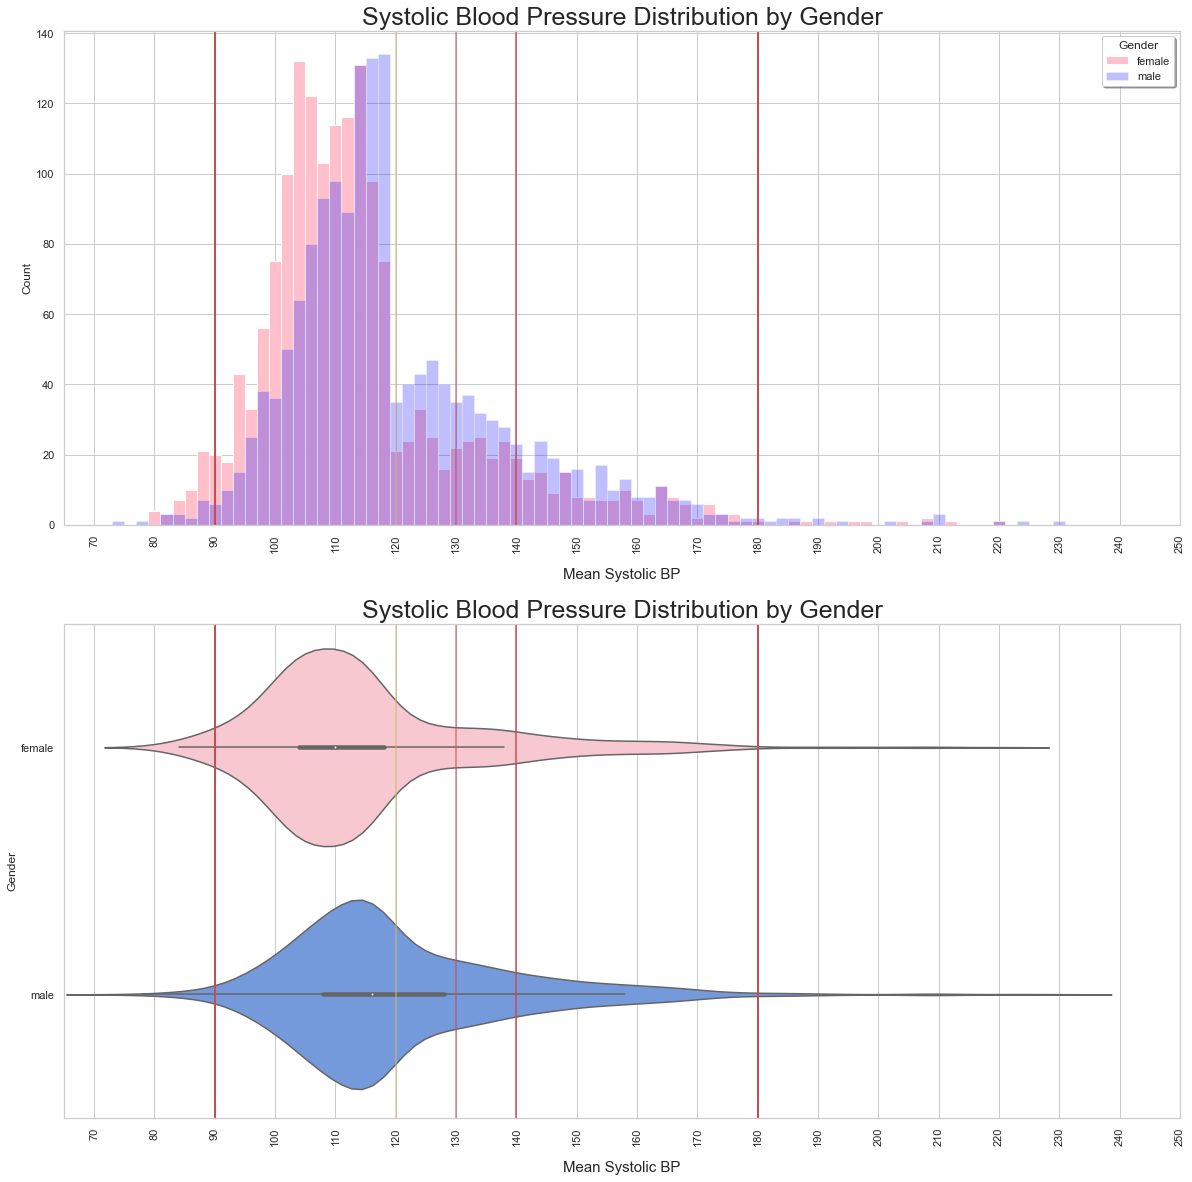

In [29]:
plt.figure(figsize=[20, 20])
sb.set_theme(style='whitegrid')

plt.subplot(2,1,1)

bins = np.arange(65, 250+2, 2)

plt.hist(data=df[df.gender == 'female'], x='sys_bp', bins= bins, color='pink', alpha=.99);
plt.hist(data=df[df.gender == 'male'], x='sys_bp', bins= bins, color='blue', alpha=.25);
plt.legend(['female', 'male'], loc='upper right', title='Gender', shadow=True)

plt.axvline(x=90, linestyle='-', linewidth=2, color='r', alpha=1)
plt.axvline(x=120, linestyle='-', linewidth=2, color='y', alpha=.5)
plt.axvline(x=130, linestyle='-', linewidth=2, color='r', alpha=.5)
plt.axvline(x=140, linestyle='-', linewidth=2, color='r', alpha=.75)
plt.axvline(x=180, linestyle='-', linewidth=2, color='r', alpha=1)

ticks = np.arange(60, 260, 10)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.xticks(ticks, labels, rotation=90)
plt.title('Systolic Blood Pressure Distribution by Gender', fontsize= 25)
plt.xlabel('Mean Systolic BP', fontsize= 15, labelpad=15)
plt.ylabel('Count')
plt.xlim(65, 250);


plt.subplot(2,1,2)
sb.violinplot(data=df, x='sys_bp', y='gender', order=['female', 'male'], orient='horizontal', palette=['pink', 'cornflowerblue']);

plt.axvline(x=90, linestyle='-', linewidth=2, color='r', alpha=1)
plt.axvline(x=120, linestyle='-', linewidth=2, color='y', alpha=.5)
plt.axvline(x=130, linestyle='-', linewidth=2, color='r', alpha=.5)
plt.axvline(x=140, linestyle='-', linewidth=2, color='r', alpha=.75)
plt.axvline(x=180, linestyle='-', linewidth=2, color='r', alpha=1)

ticks = np.arange(60, 260, 10)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.xticks(ticks, labels, rotation=90)
plt.title('Systolic Blood Pressure Distribution by Gender', fontsize= 25)
plt.xlabel('Mean Systolic BP', fontsize= 15, labelpad=15)
plt.ylabel('Gender')
plt.xlim(65, 250);

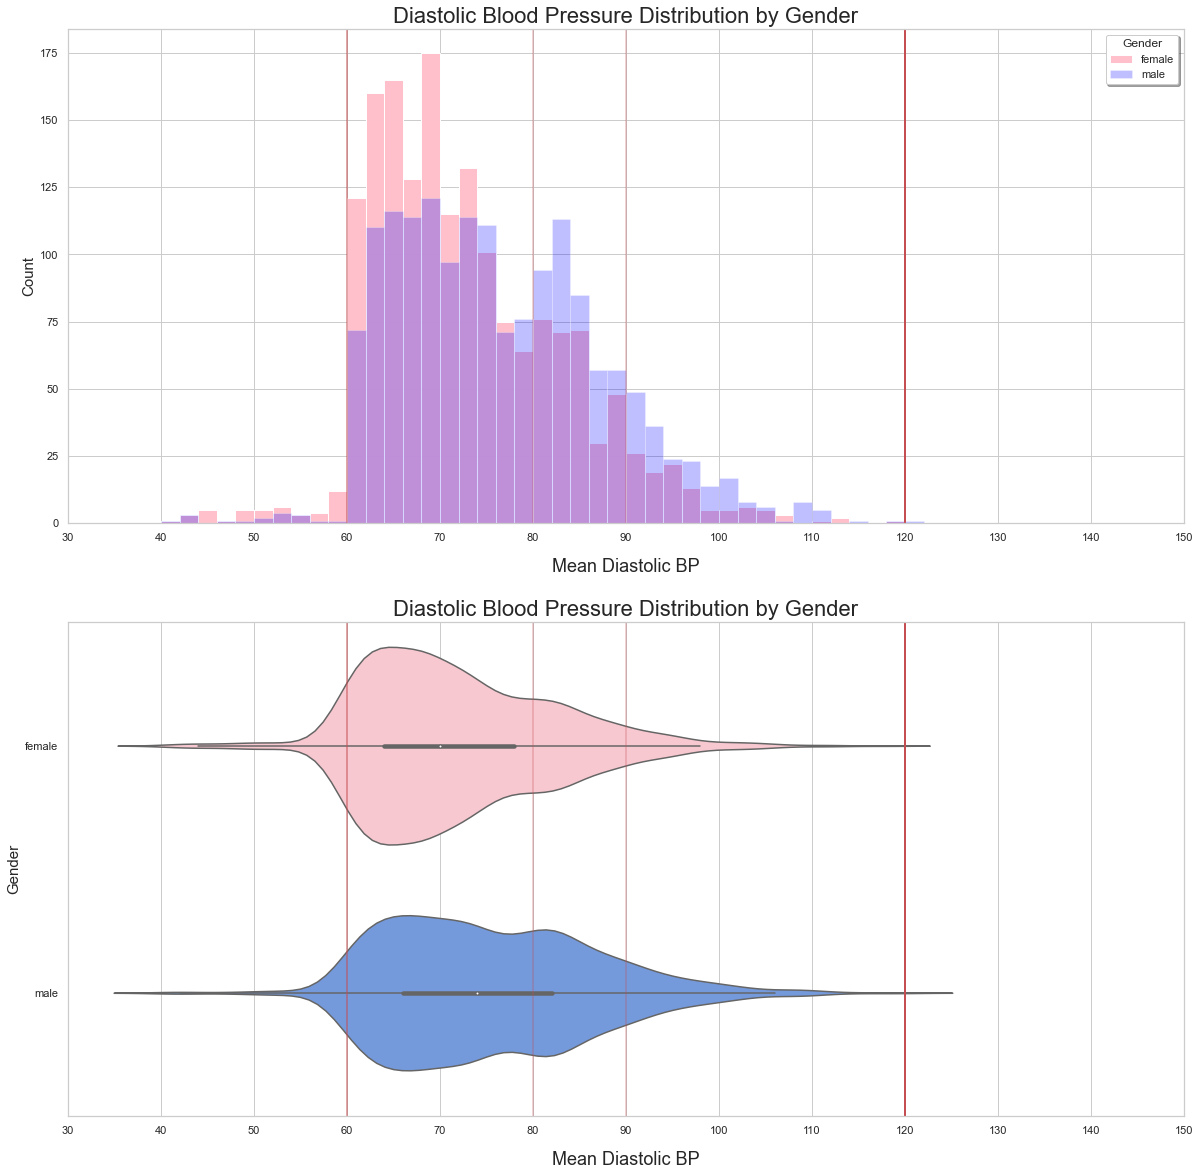

In [30]:
plt.figure(figsize=[20, 20])
sb.set_theme(style='whitegrid')

plt.subplot(2,1,1)

bins = np.arange(30, 150+2, 2)

plt.hist(data=df[df.gender == 'female'], x='dia_bp', bins= bins, color='pink', alpha=.99);
plt.hist(data=df[df.gender == 'male'], x='dia_bp', bins= bins, color='blue', alpha=.25);
plt.legend(['female', 'male'], loc='upper right', title='Gender', shadow=True)

plt.axvline(x=120, linestyle='-', linewidth=2, color='r', alpha=1)
plt.axvline(x=60, linestyle='-', linewidth=2, color='r', alpha=.5)
plt.axvline(x=80, linestyle='-', linewidth=2, color='r', alpha=.25)
plt.axvline(x=90, linestyle='-', linewidth=2, color='r', alpha=.25)

ticks = np.arange(30, 160, 10)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.xticks(ticks, labels, rotation=0)
plt.title('Diastolic Blood Pressure Distribution by Gender', fontsize= 22)
plt.xlabel('Mean Diastolic BP', fontsize= 18, labelpad=15)
plt.ylabel('Count', fontsize= 15)
plt.xlim(30, 150);


plt.subplot(2,1,2)
sb.violinplot(data=df, x='dia_bp', y='gender', order=['female', 'male'], orient='horizontal', palette=['pink', 'cornflowerblue']);

plt.axvline(x=120, linestyle='-', linewidth=2, color='r', alpha=1)
plt.axvline(x=60, linestyle='-', linewidth=2, color='r', alpha=.5)
plt.axvline(x=80, linestyle='-', linewidth=2, color='r', alpha=.25)
plt.axvline(x=90, linestyle='-', linewidth=2, color='r', alpha=.25)

ticks = np.arange(30, 160, 10)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.xticks(ticks, labels, rotation=0)
plt.title('Diastolic Blood Pressure Distribution by Gender', fontsize= 22)
plt.xlabel('Mean Diastolic BP', fontsize= 18, labelpad=15)
plt.ylabel('Gender', fontsize= 15)
plt.xlim(30, 150);

### diseases by age

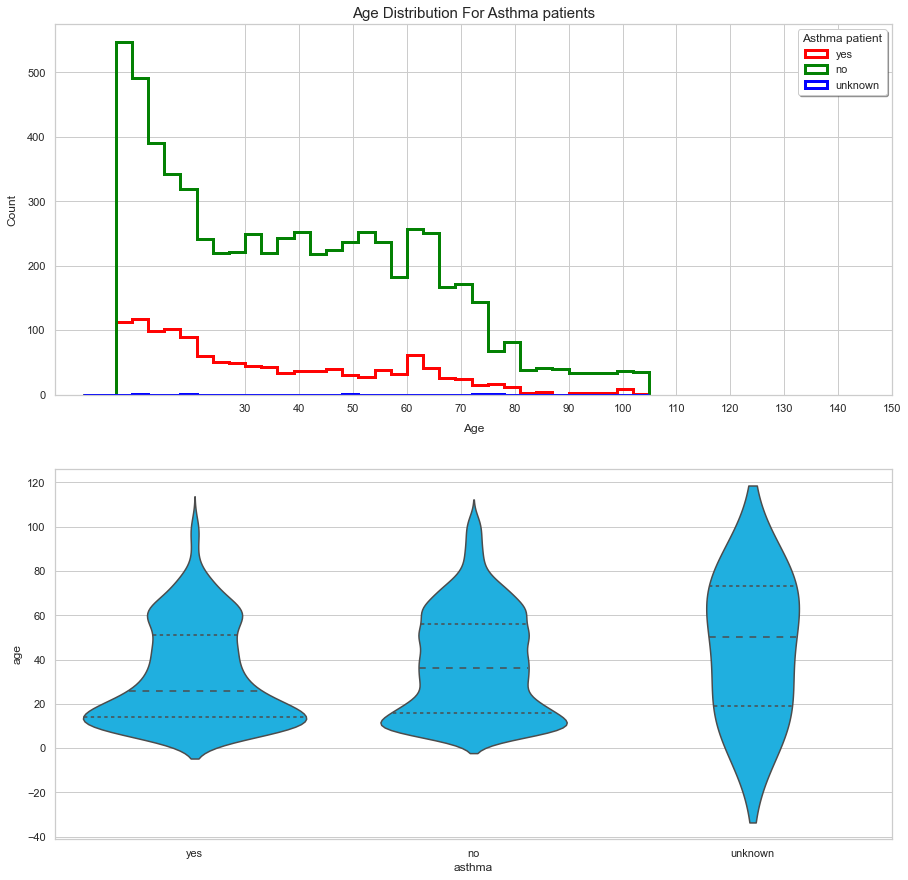

In [31]:
plt.figure(figsize=[15, 15])

plt.subplot(2,1,1)
#_______________________________first plot____________________________________
bins = np.arange(0, df.age.max()+3, 3)
plt.hist(data=df[df.asthma == 'yes'], x='age', bins= bins, color='red', alpha=.99, histtype='step', lw=3);
plt.hist(data=df[df.asthma == 'no'], x='age', bins= bins, color='green', alpha=.99, histtype='step', lw=3);
plt.hist(data=df[df.asthma == 'unknown'], x='age', bins= bins, color='blue', alpha=.99, histtype='step', lw=3);

plt.legend(['yes', 'no', 'unknown'], loc='upper right', title='Asthma patient', shadow=True)
plt.xticks(ticks, labels)

#plt.axvline(x=df.age.mean(), linestyle='--', linewidth=2, color='r')

ticks = np.arange(0, df.age.max()+3, 3)
labels = ['{:.0f}'.format(v) for v in ticks]

plt.title('Age Distribution For Asthma patients', fontsize= 15)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Age', labelpad=10);

#--------------------------------------------
plt.subplot(2,1,2)
sb.violinplot(data=df, x='asthma', y='age', color='deepskyblue', inner='quartile');

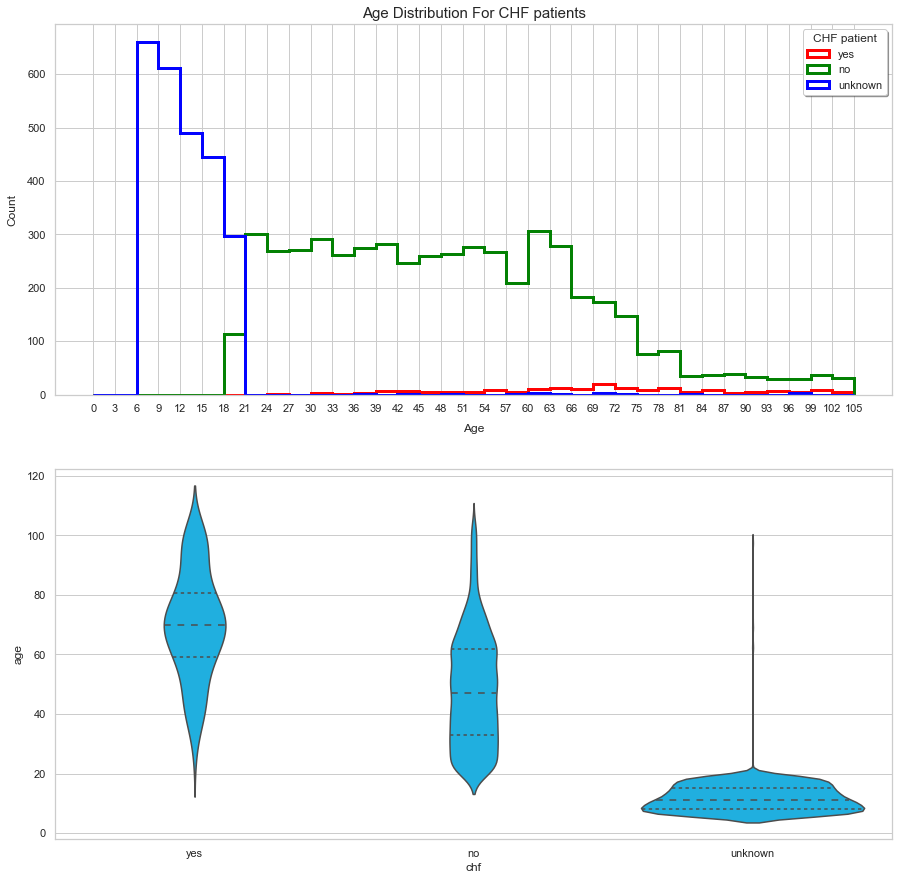

In [32]:
plt.figure(figsize=[15, 15])

plt.subplot(2,1,1)
#_______________________________first plot____________________________________
bins = np.arange(0, df.age.max()+3, 3)
plt.hist(data=df[df.chf == 'yes'], x='age', bins= bins, color='red', alpha=.99, histtype='step', lw=3);
plt.hist(data=df[df.chf == 'no'], x='age', bins= bins, color='green', alpha=.99, histtype='step', lw=3);
plt.hist(data=df[df.chf == 'unknown'], x='age', bins= bins, color='blue', alpha=.99, histtype='step', lw=3);

plt.legend(['yes', 'no', 'unknown'], loc='upper right', title='CHF patient', shadow=True)
plt.xticks(ticks, labels)

#plt.axvline(x=df.age.mean(), linestyle='--', linewidth=2, color='r')

ticks = np.arange(0, df.age.max()+3, 3)
labels = ['{:.0f}'.format(v) for v in ticks]

plt.title('Age Distribution For CHF patients', fontsize= 15)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Age', labelpad=10);

#--------------------------------------------
plt.subplot(2,1,2)
sb.violinplot(data=df, x='chf', y='age', color='deepskyblue', inner='quartile');

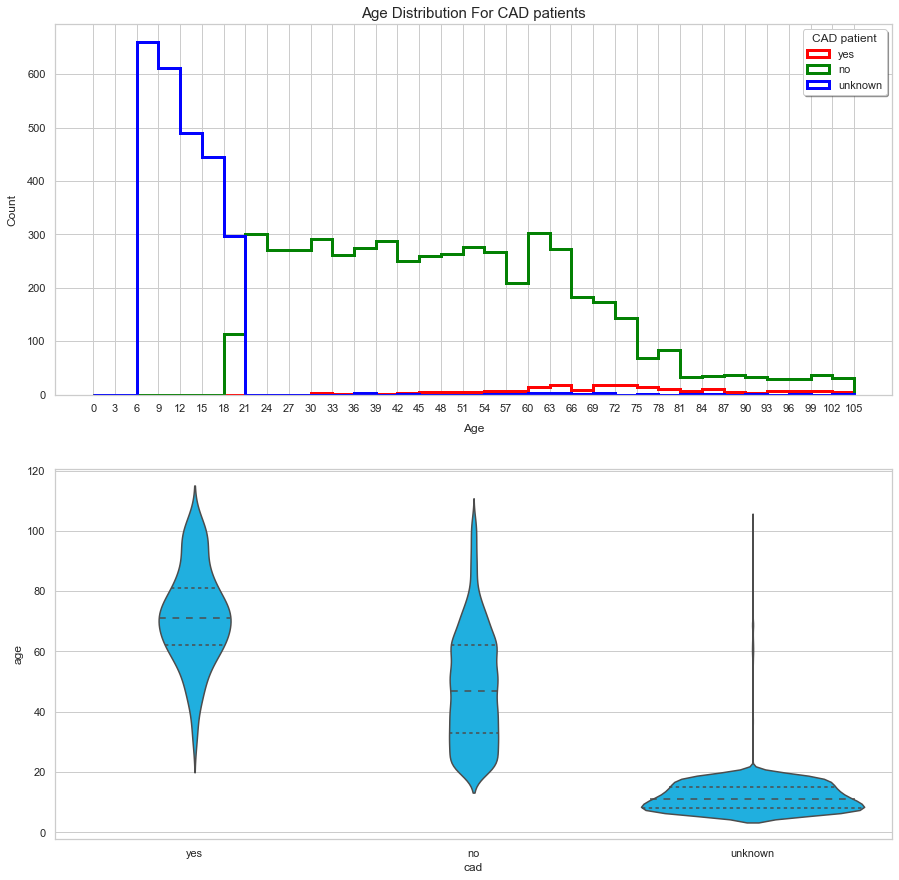

In [33]:
plt.figure(figsize=[15, 15])

plt.subplot(2,1,1)

#_______________________________first plot____________________________________
bins = np.arange(0, df.age.max()+3, 3)
plt.hist(data=df[df.cad == 'yes'], x='age', bins= bins, color='red', alpha=.99, histtype='step', lw=3);
plt.hist(data=df[df.cad == 'no'], x='age', bins= bins, color='green', alpha=.99, histtype='step', lw=3);
plt.hist(data=df[df.cad == 'unknown'], x='age', bins= bins, color='blue', alpha=.99, histtype='step', lw=3);

plt.legend(['yes', 'no', 'unknown'], loc='upper right', title='CAD patient', shadow=True)
plt.xticks(ticks, labels)

#plt.axvline(x=df.age.mean(), linestyle='--', linewidth=2, color='r')

ticks = np.arange(0, df.age.max()+3, 3)
labels = ['{:.0f}'.format(v) for v in ticks]

plt.title('Age Distribution For CAD patients', fontsize= 15)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Age', labelpad=10);

#--------------------------------------------
plt.subplot(2,1,2)
sb.violinplot(data=df, x='cad', y='age', color='deepskyblue', inner='quartile');

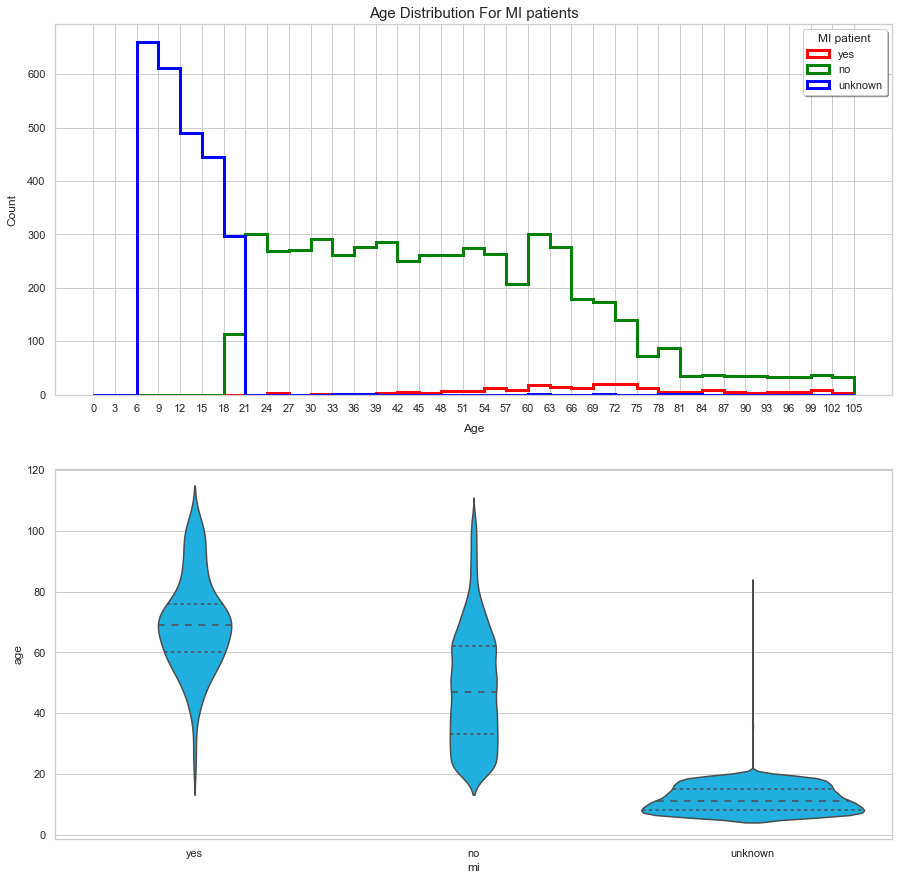

In [34]:
plt.figure(figsize=[15, 15])

plt.subplot(2,1,1)

#_______________________________first plot____________________________________
bins = np.arange(0, df.age.max()+3, 3)
plt.hist(data=df[df.mi == 'yes'], x='age', bins= bins, color='red', alpha=.99, histtype='step', lw=3);
plt.hist(data=df[df.mi == 'no'], x='age', bins= bins, color='green', alpha=.99, histtype='step', lw=3);
plt.hist(data=df[df.mi == 'unknown'], x='age', bins= bins, color='blue', alpha=.99, histtype='step', lw=3);

plt.legend(['yes', 'no', 'unknown'], loc='upper right', title='MI patient', shadow=True)
plt.xticks(ticks, labels)

#plt.axvline(x=df.age.mean(), linestyle='--', linewidth=2, color='r')

ticks = np.arange(0, df.age.max()+3, 3)
labels = ['{:.0f}'.format(v) for v in ticks]

plt.title('Age Distribution For MI patients', fontsize= 15)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Age', labelpad=10);

#--------------------------------------------
plt.subplot(2,1,2)
sb.violinplot(data=df, x='mi', y='age', color='deepskyblue', inner='quartile');

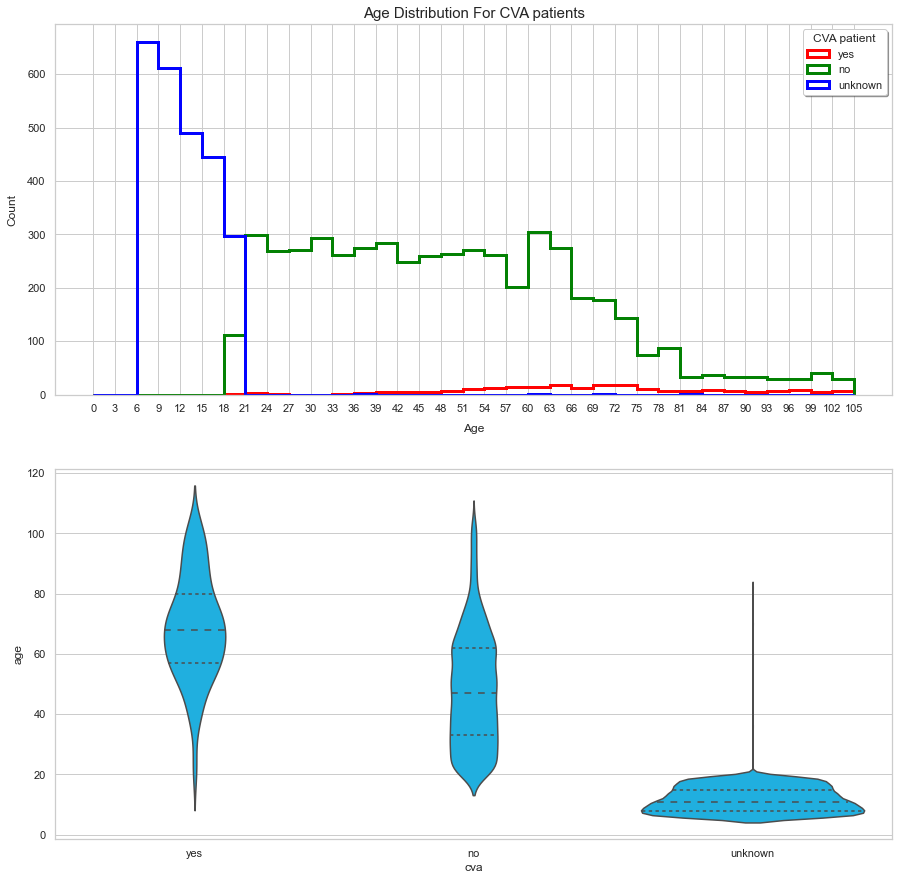

In [35]:
plt.figure(figsize=[15, 15])

plt.subplot(2,1,1)

#_______________________________first plot____________________________________
bins = np.arange(0, df.age.max()+3, 3)
plt.hist(data=df[df.cva == 'yes'], x='age', bins= bins, color='red', alpha=.99, histtype='step', lw=3);
plt.hist(data=df[df.cva == 'no'], x='age', bins= bins, color='green', alpha=.99, histtype='step', lw=3);
plt.hist(data=df[df.cva == 'unknown'], x='age', bins= bins, color='blue', alpha=.99, histtype='step', lw=3);

plt.legend(['yes', 'no', 'unknown'], loc='upper right', title='CVA patient', shadow=True)
plt.xticks(ticks, labels)

#plt.axvline(x=df.age.mean(), linestyle='--', linewidth=2, color='r')

ticks = np.arange(0, df.age.max()+3, 3)
labels = ['{:.0f}'.format(v) for v in ticks]

plt.title('Age Distribution For CVA patients', fontsize= 15)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Age', labelpad=10);

#-----------------------------------------
plt.subplot(2,1,2)
sb.violinplot(data=df, x='cva', y='age', color='deepskyblue', inner='quartile');

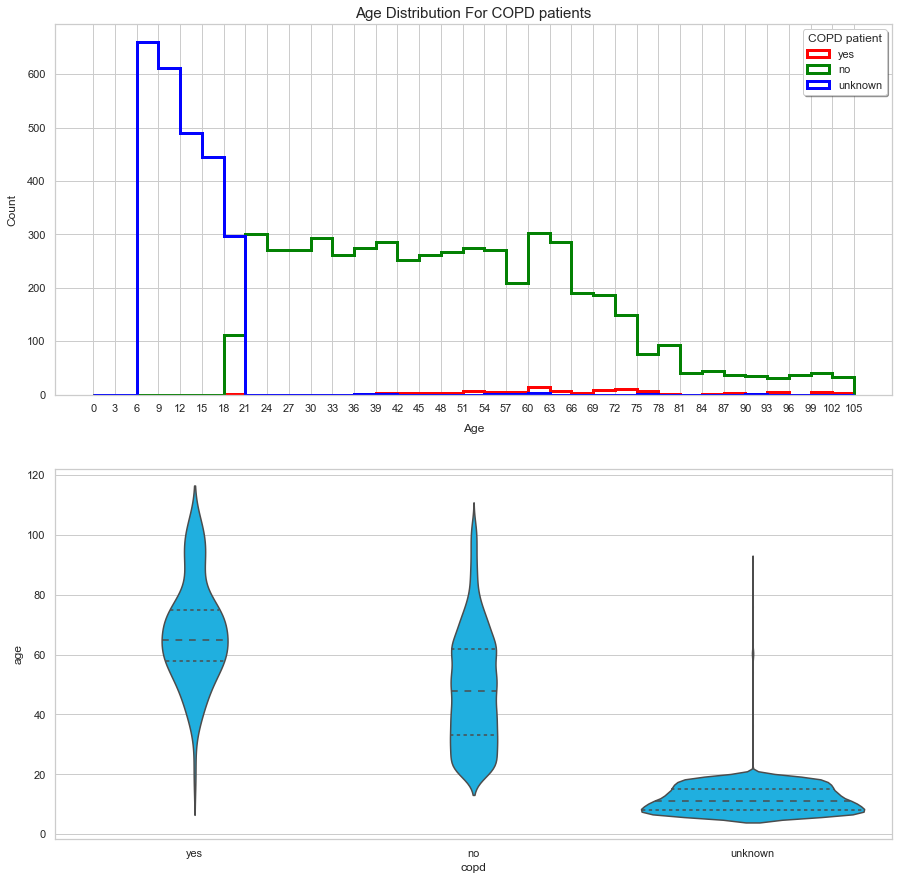

In [36]:
plt.figure(figsize=[15, 15])

plt.subplot(2,1,1)
#_______________________________first plot____________________________________
bins = np.arange(0, df.age.max()+3, 3)
plt.hist(data=df[df.copd == 'yes'], x='age', bins= bins, color='red', alpha=.99, histtype='step', lw=3);
plt.hist(data=df[df.copd == 'no'], x='age', bins= bins, color='green', alpha=.99, histtype='step', lw=3);
plt.hist(data=df[df.copd == 'unknown'], x='age', bins= bins, color='blue', alpha=.99, histtype='step', lw=3);

plt.legend(['yes', 'no', 'unknown'], loc='upper right', title='COPD patient', shadow=True)
plt.xticks(ticks, labels)

#plt.axvline(x=df.age.mean(), linestyle='--', linewidth=2, color='r')

ticks = np.arange(0, df.age.max()+3, 3)
labels = ['{:.0f}'.format(v) for v in ticks]

plt.title('Age Distribution For COPD patients', fontsize= 15)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Age', labelpad=10);

#-------------------------------------------
plt.subplot(2,1,2)
sb.violinplot(data=df, x='copd', y='age', color='deepskyblue', inner='quartile');

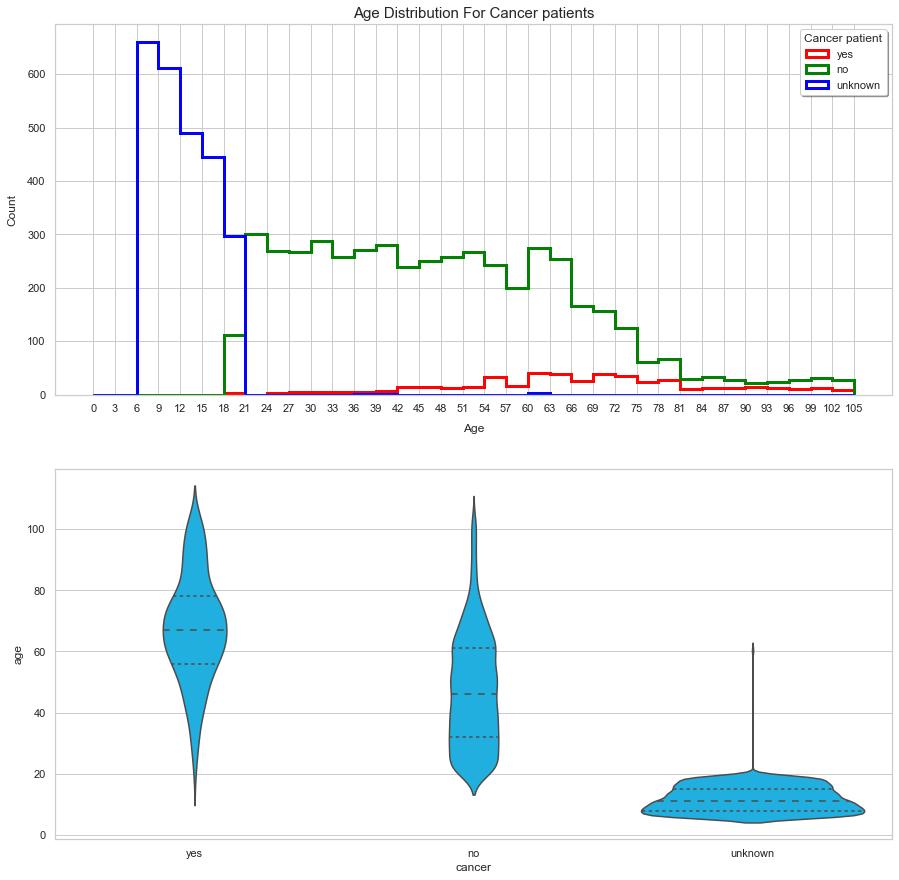

In [37]:
plt.figure(figsize=[15, 15])

plt.subplot(2,1,1)
#_______________________________first plot____________________________________
bins = np.arange(0, df.age.max()+3, 3)
plt.hist(data=df[df.cancer == 'yes'], x='age', bins= bins, color='red', alpha=.99, histtype='step', lw=3);
plt.hist(data=df[df.cancer == 'no'], x='age', bins= bins, color='green', alpha=.99, histtype='step', lw=3);
plt.hist(data=df[df.cancer == 'unknown'], x='age', bins= bins, color='blue', alpha=.99, histtype='step', lw=3);

plt.legend(['yes', 'no', 'unknown'], loc='upper right', title='Cancer patient', shadow=True)
plt.xticks(ticks, labels)

#plt.axvline(x=df.age.mean(), linestyle='--', linewidth=2, color='r')

ticks = np.arange(0, df.age.max()+3, 3)
labels = ['{:.0f}'.format(v) for v in ticks]

plt.title('Age Distribution For Cancer patients', fontsize= 15)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Age', labelpad=10);

#------------------------------------------------
plt.subplot(2,1,2)
sb.violinplot(data=df, x='cancer', y='age', color='deepskyblue', inner='quartile');

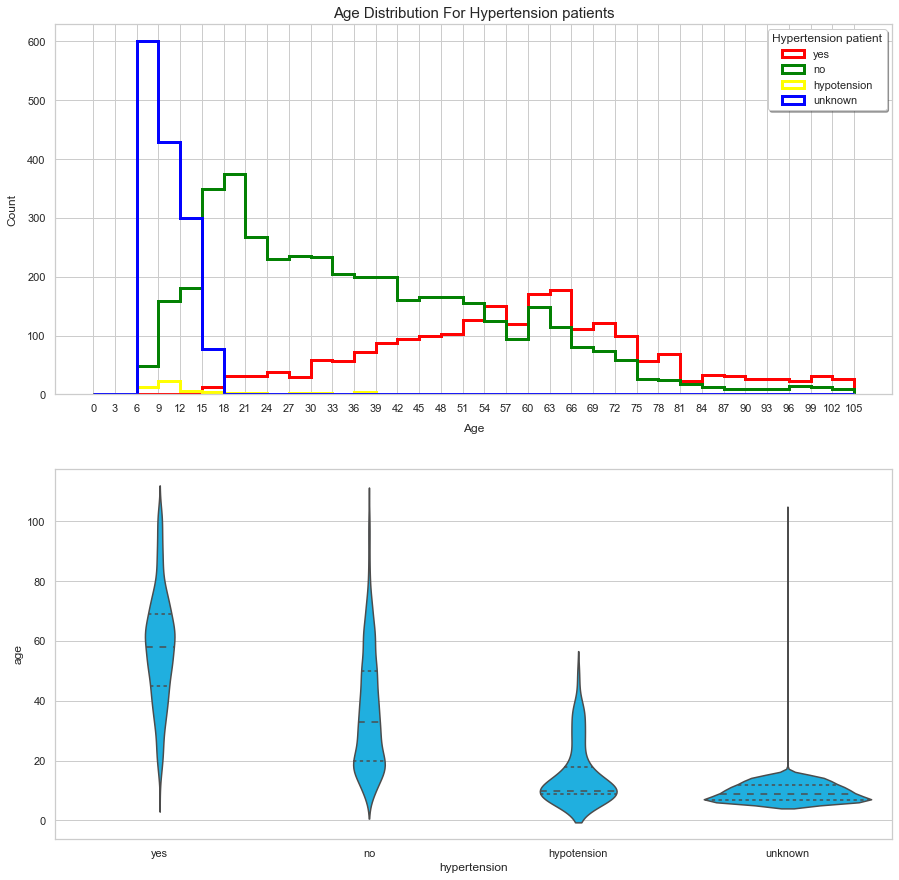

In [38]:
plt.figure(figsize=[15, 15])

plt.subplot(2,1,1)
#_______________________________first plot____________________________________
bins = np.arange(0, df.age.max()+3, 3)
plt.hist(data=df[df.hypertension == 'yes'], x='age', bins= bins, color='red', alpha=.99, histtype='step', lw=3);
plt.hist(data=df[df.hypertension == 'no'], x='age', bins= bins, color='green', alpha=.99, histtype='step', lw=3);
plt.hist(data=df[df.hypertension == 'hypotension'], x='age', bins= bins, color='yellow', alpha=.99, histtype='step', lw=3);
plt.hist(data=df[df.hypertension == 'unknown'], x='age', bins= bins, color='blue', alpha=.99, histtype='step', lw=3);

plt.legend(['yes', 'no', 'hypotension', 'unknown'], loc='upper right', title='Hypertension patient', shadow=True)
plt.xticks(ticks, labels)

#plt.axvline(x=df.age.mean(), linestyle='--', linewidth=2, color='r')

ticks = np.arange(0, df.age.max()+3, 3)
labels = ['{:.0f}'.format(v) for v in ticks]

plt.title('Age Distribution For Hypertension patients', fontsize= 15)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Age', labelpad=10);

#----------------------------------------
plt.subplot(2,1,2)
sb.violinplot(data=df, x='hypertension', y='age', color='deepskyblue', inner='quartile');

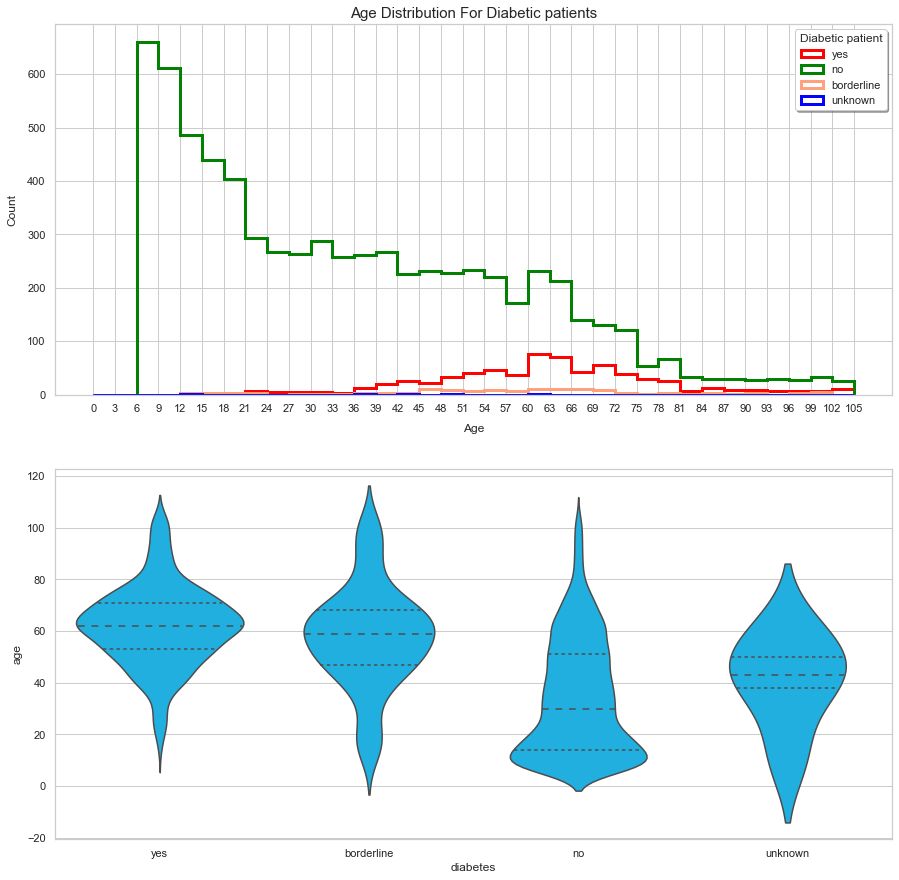

In [39]:
plt.figure(figsize=[15, 15])

plt.subplot(2,1,1)
#_______________________________first plot____________________________________
bins = np.arange(0, df.age.max()+3, 3)
plt.hist(data=df[df.diabetes == 'yes'], x='age', bins= bins, color='red', alpha=.99, histtype='step', lw=3);
plt.hist(data=df[df.diabetes == 'no'], x='age', bins= bins, color='green', alpha=.99, histtype='step', lw=3);
plt.hist(data=df[df.diabetes == 'borderline'], x='age', bins= bins, color='lightsalmon', alpha=.99, histtype='step', lw=3);
plt.hist(data=df[df.diabetes == 'unknown'], x='age', bins= bins, color='blue', alpha=.99, histtype='step', lw=3);

plt.legend(['yes', 'no', 'borderline', 'unknown'], loc='upper right', title='Diabetic patient', shadow=True)
plt.xticks(ticks, labels)

#plt.axvline(x=df.age.mean(), linestyle='--', linewidth=2, color='r')

ticks = np.arange(0, df.age.max()+3, 3)
labels = ['{:.0f}'.format(v) for v in ticks]

plt.title('Age Distribution For Diabetic patients', fontsize= 15)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Age', labelpad=10);

#----------------------------------------------------
plt.subplot(2,1,2)
sb.violinplot(data=df, x='diabetes', y='age', color='deepskyblue', inner='quartile');

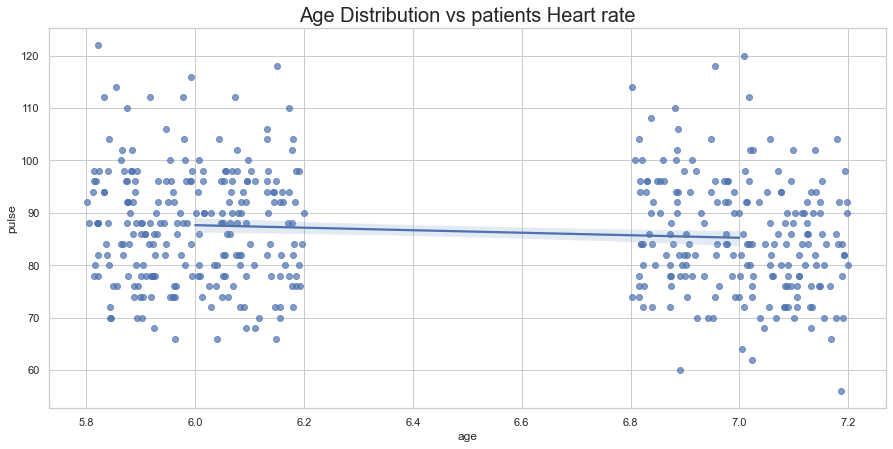

In [40]:
plt.figure(figsize=[15,7])
sb.regplot(data=df, x='age', y='pulse', x_jitter=0.2, scatter_kws={'alpha':.7})
plt.title('Age Distribution vs patients Heart rate', fontsize=20);

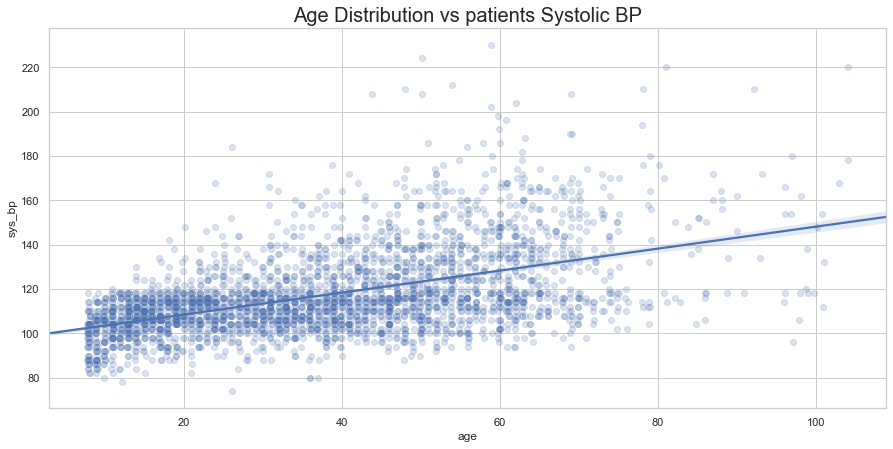

In [41]:
plt.figure(figsize=[15,7])
sb.regplot(data=df, x='age', y='sys_bp', x_jitter=0.2, scatter_kws={'alpha':.2}, truncate=False)
plt.title('Age Distribution vs patients Systolic BP', fontsize=20);

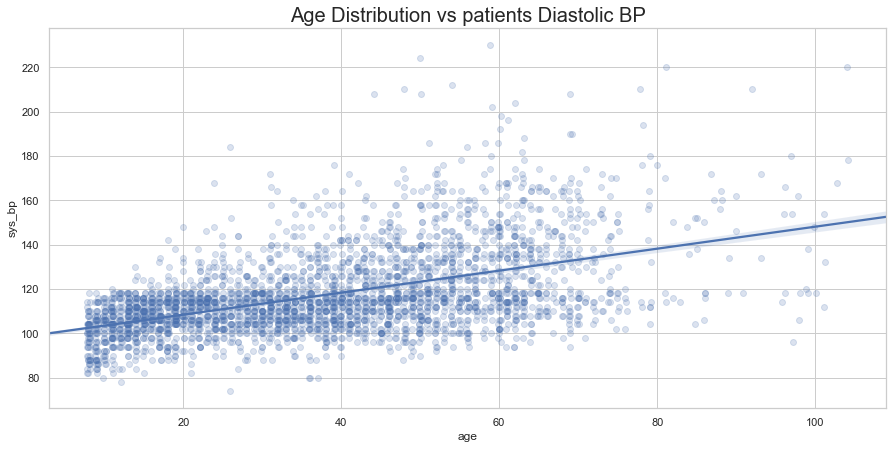

In [42]:
plt.figure(figsize=[15,7])
sb.regplot(data=df, x='age', y='sys_bp', x_jitter=0.2, scatter_kws={'alpha':.2}, truncate=False)
plt.title('Age Distribution vs patients Diastolic BP', fontsize=20);

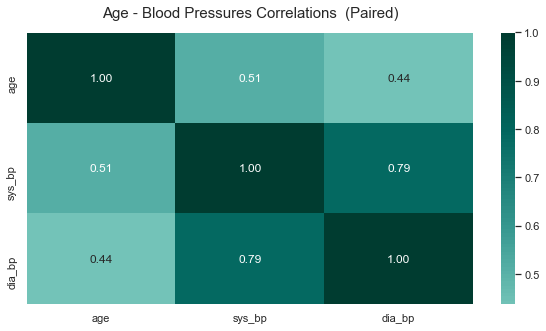

In [43]:
some_features = ['age', 'sys_bp', 'dia_bp']
correlations = df[some_features].corr()

plt.figure(figsize= [10,5])
sb.heatmap(correlations, cmap='BrBG', annot=True, fmt='.2f', center = 0)

plt.title('Age - Blood Pressures Correlations  (Paired)', fontsize= 15, pad=15)
plt.xlabel('', fontsize= 15, labelpad=20)
plt.ylabel('', fontsize= 15, labelpad=20);

### Diseases vs general health

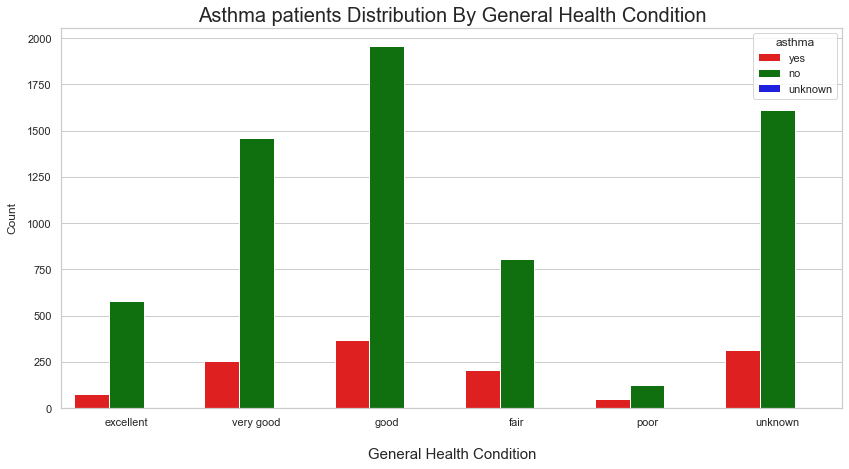

In [44]:
plt.figure(figsize=[14, 7])

ax = sb.countplot(data=df, x='gen_health', hue='asthma', 
             palette=['red', 'green', 'blue'])

plt.xticks(rotation=0)
plt.title("Asthma patients Distribution By General Health Condition", fontsize= 20)
plt.ylabel('Count', labelpad=10)
plt.xlabel('General Health Condition', fontsize=15, labelpad=20);

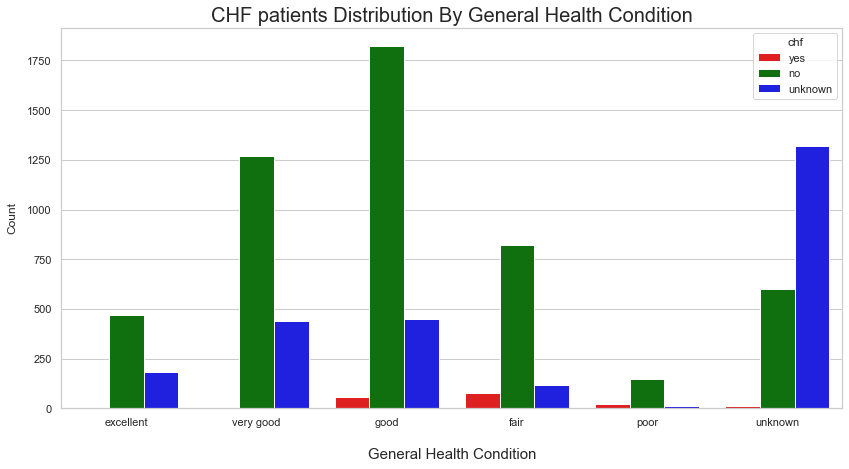

In [45]:
plt.figure(figsize=[14, 7])

ax = sb.countplot(data=df, x='gen_health', hue='chf', 
             palette=['red', 'green', 'blue'])

plt.xticks(rotation=0)
plt.title("CHF patients Distribution By General Health Condition", fontsize= 20)
plt.ylabel('Count', labelpad=10)
plt.xlabel('General Health Condition', fontsize=15, labelpad=20);

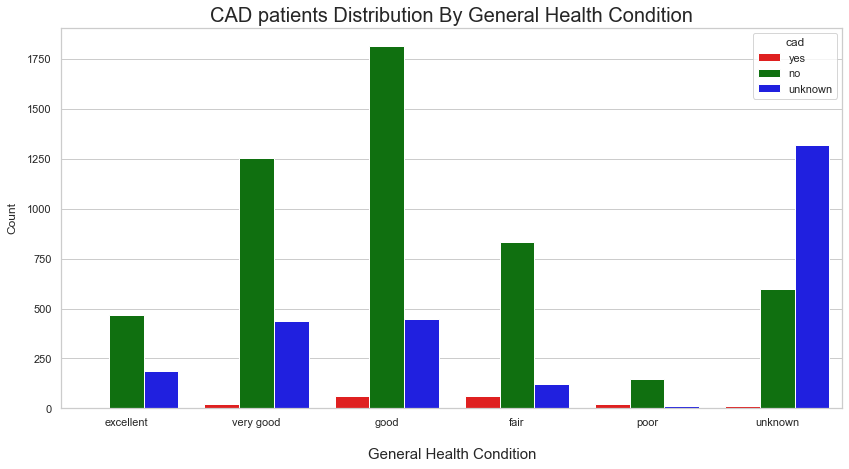

In [46]:
plt.figure(figsize=[14, 7])

ax = sb.countplot(data=df, x='gen_health', hue='cad', 
             palette=['red', 'green', 'blue'])

plt.xticks(rotation=0)
plt.title("CAD patients Distribution By General Health Condition", fontsize= 20)
plt.ylabel('Count', labelpad=10)
plt.xlabel('General Health Condition', fontsize=15, labelpad=20);

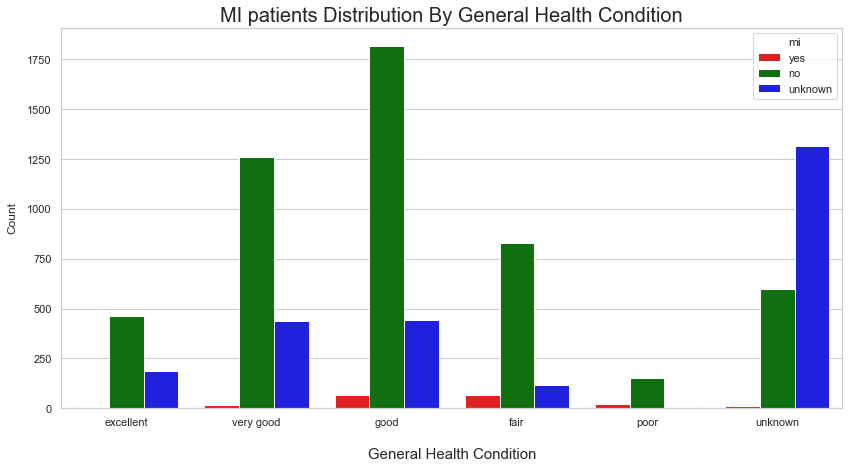

In [47]:
plt.figure(figsize=[14, 7])

ax = sb.countplot(data=df, x='gen_health', hue='mi', 
             palette=['red', 'green', 'blue'])

plt.xticks(rotation=0)
plt.title("MI patients Distribution By General Health Condition", fontsize= 20)
plt.ylabel('Count', labelpad=10)
plt.xlabel('General Health Condition', fontsize=15, labelpad=20);

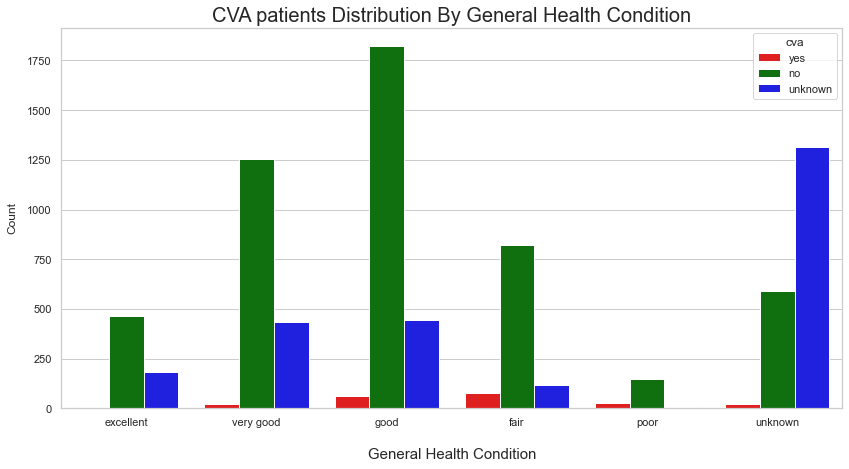

In [48]:
plt.figure(figsize=[14, 7])

ax = sb.countplot(data=df, x='gen_health', hue='cva', 
             palette=['red', 'green', 'blue'])

plt.xticks(rotation=0)
plt.title("CVA patients Distribution By General Health Condition", fontsize= 20)
plt.ylabel('Count', labelpad=10)
plt.xlabel('General Health Condition', fontsize=15, labelpad=20);

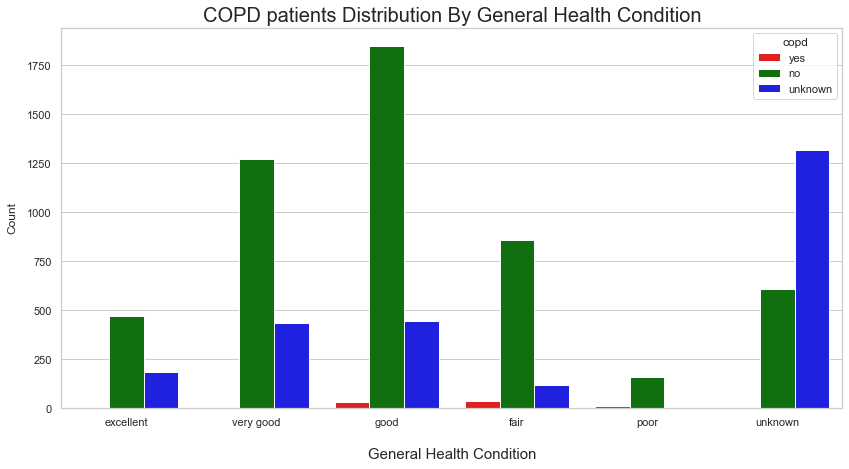

In [49]:
plt.figure(figsize=[14, 7])

ax = sb.countplot(data=df, x='gen_health', hue='copd', 
             palette=['red', 'green', 'blue'])

plt.xticks(rotation=0)
plt.title("COPD patients Distribution By General Health Condition", fontsize= 20)
plt.ylabel('Count', labelpad=10)
plt.xlabel('General Health Condition', fontsize=15, labelpad=20);

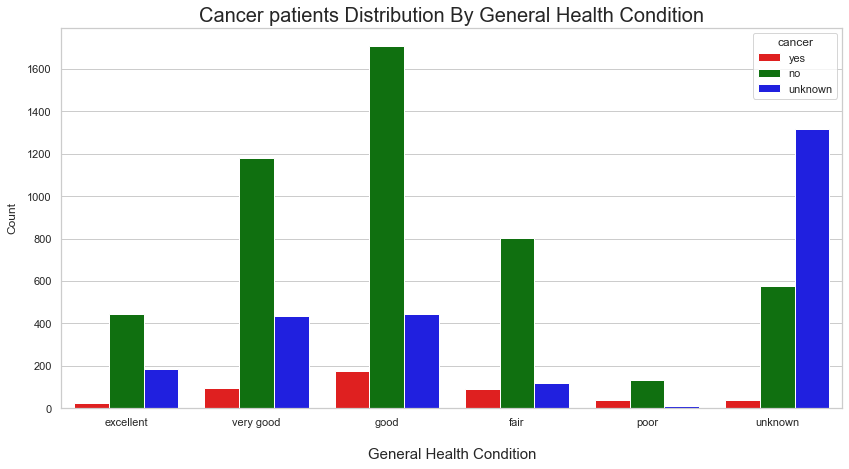

In [50]:
plt.figure(figsize=[14, 7])

ax = sb.countplot(data=df, x='gen_health', hue='cancer', 
             palette=['red', 'green', 'blue'])

plt.xticks(rotation=0)
plt.title("Cancer patients Distribution By General Health Condition", fontsize= 20)
plt.ylabel('Count', labelpad=10)
plt.xlabel('General Health Condition', fontsize=15, labelpad=20);

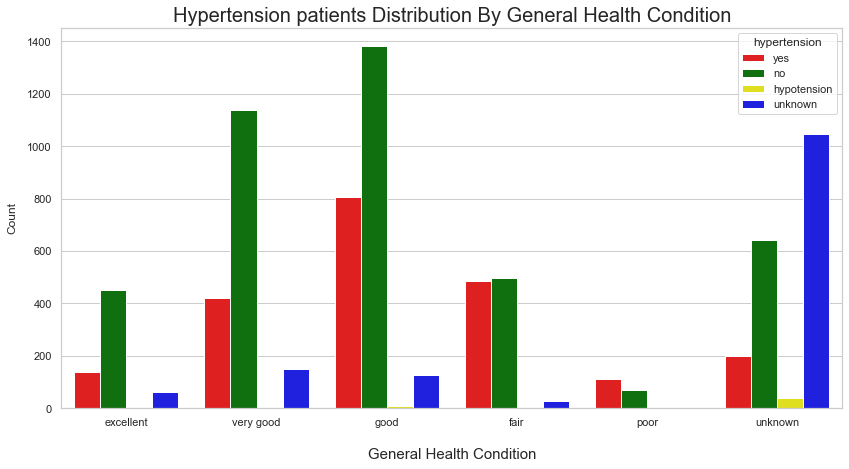

In [51]:
plt.figure(figsize=[14, 7])

ax = sb.countplot(data=df, x='gen_health', hue='hypertension', 
             palette=['red', 'green', 'yellow', 'blue'])

plt.xticks(rotation=0)
plt.title("Hypertension patients Distribution By General Health Condition", fontsize= 20)
plt.ylabel('Count', labelpad=10)
plt.xlabel('General Health Condition', fontsize=15, labelpad=20);

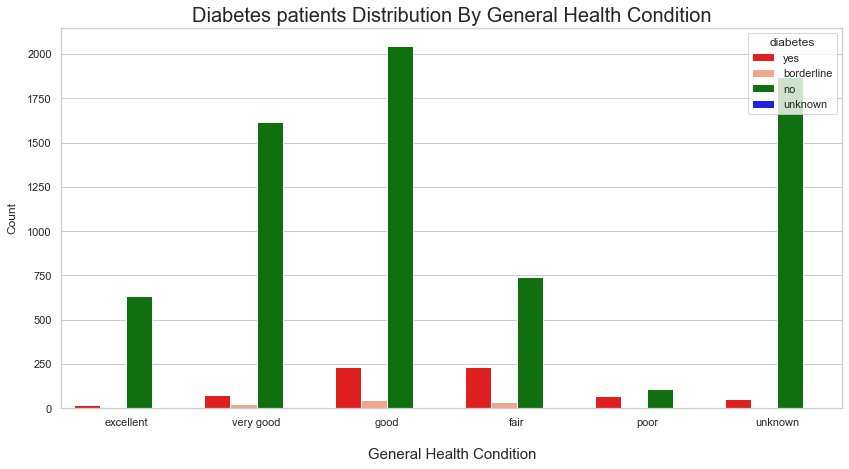

In [52]:
plt.figure(figsize=[14, 7])

ax = sb.countplot(data=df, x='gen_health', hue='diabetes', 
             palette=['red', 'lightsalmon', 'green', 'blue'])

plt.xticks(rotation=0)
plt.title("Diabetes patients Distribution By General Health Condition", fontsize= 20)
plt.ylabel('Count', labelpad=10)
plt.xlabel('General Health Condition', fontsize=15, labelpad=20);

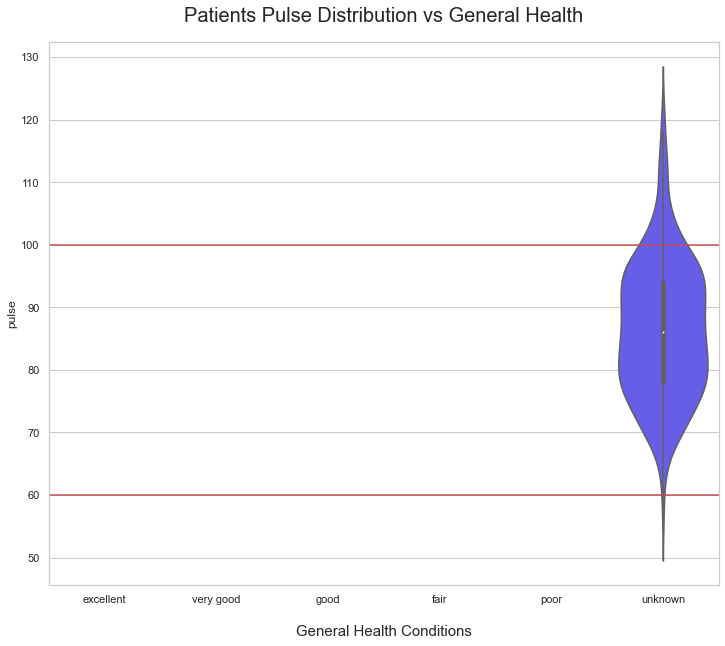

In [55]:
plt.figure(figsize=[12,10])
sb.set_theme(style='whitegrid')

plt.axhline(y=60, linestyle='-', linewidth=2, color='r', alpha=.75)
plt.axhline(y=100, linestyle='-', linewidth=2, color='r', alpha=.75)

sb.violinplot(data=df, x='gen_health', y='pulse', color=sb.color_palette('rainbow', 10)[0])

plt.title('Patients Pulse Distribution vs General Health', fontsize=20, pad=20)
plt.xlabel('General Health Conditions', fontsize=15, labelpad=20);

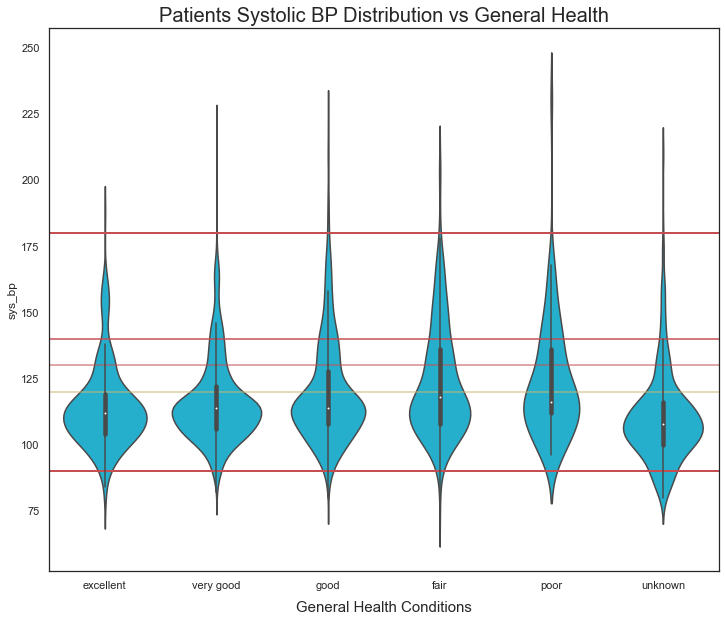

In [57]:
plt.figure(figsize=[12,10])
sb.set_theme(style='white')

plt.axhline(y=90, linestyle='-', linewidth=2, color='r', alpha=1)
plt.axhline(y=120, linestyle='-', linewidth=2, color='y', alpha=.5)
plt.axhline(y=130, linestyle='-', linewidth=2, color='r', alpha=.5)
plt.axhline(y=140, linestyle='-', linewidth=2, color='r', alpha=.75)
plt.axhline(y=180, linestyle='-', linewidth=2, color='r', alpha=1)

sb.violinplot(data=df, x='gen_health', y='sys_bp', color=sb.color_palette('rainbow', 10)[2])

plt.title('Patients Systolic BP Distribution vs General Health', fontsize=20)
plt.xlabel('General Health Conditions', fontsize=15, labelpad=10);

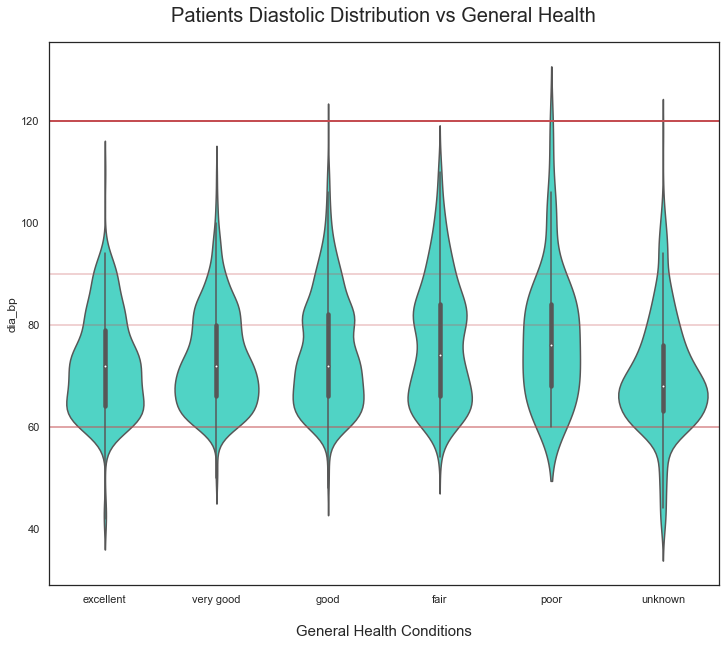

In [58]:
plt.figure(figsize=[12,10])
sb.set_theme(style='white')

plt.axhline(y=120, linestyle='-', linewidth=2, color='r', alpha=1)
plt.axhline(y=60, linestyle='-', linewidth=2, color='r', alpha=.5)
plt.axhline(y=80, linestyle='-', linewidth=2, color='r', alpha=.25)
plt.axhline(y=90, linestyle='-', linewidth=2, color='r', alpha=.25)

sb.violinplot(data=df, x='gen_health', y='dia_bp', color=sb.color_palette('rainbow', 10)[3])

plt.title('Patients Diastolic Distribution vs General Health', fontsize=20, pad=20)
plt.xlabel('General Health Conditions', fontsize=15, labelpad=20);

### asthma, emphysema(copd), and smoking

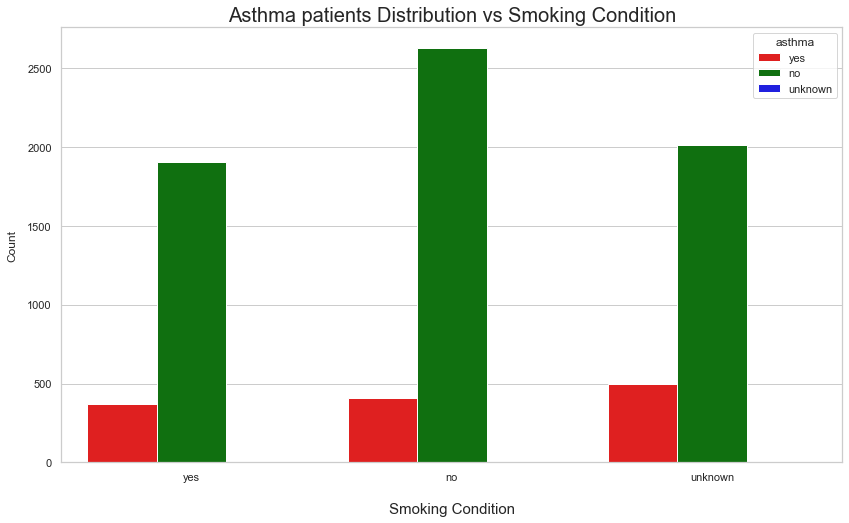

In [59]:
plt.figure(figsize=[14, 8])
sb.set_theme(style='whitegrid')

sb.countplot(data=df, x='smoker', hue='asthma', palette=['red', 'green', 'blue'])

plt.xticks(rotation=0)
plt.title("Asthma patients Distribution vs Smoking Condition", fontsize= 20)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Smoking Condition', fontsize=15, labelpad=20);

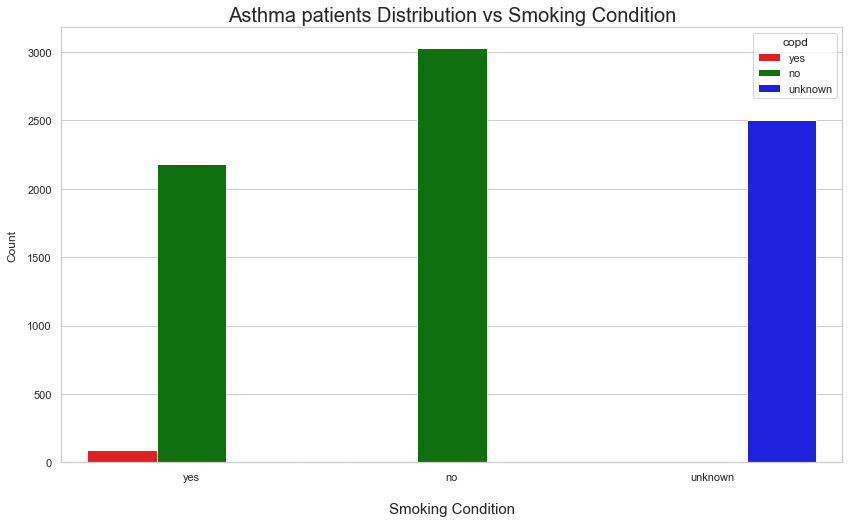

In [60]:
plt.figure(figsize=[14, 8])
sb.set_theme(style='whitegrid')

sb.countplot(data=df, x='smoker', hue='copd', palette=['red', 'green', 'blue'])

plt.xticks(rotation=0)
plt.title("Asthma patients Distribution vs Smoking Condition", fontsize= 20)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Smoking Condition', fontsize=15, labelpad=20);

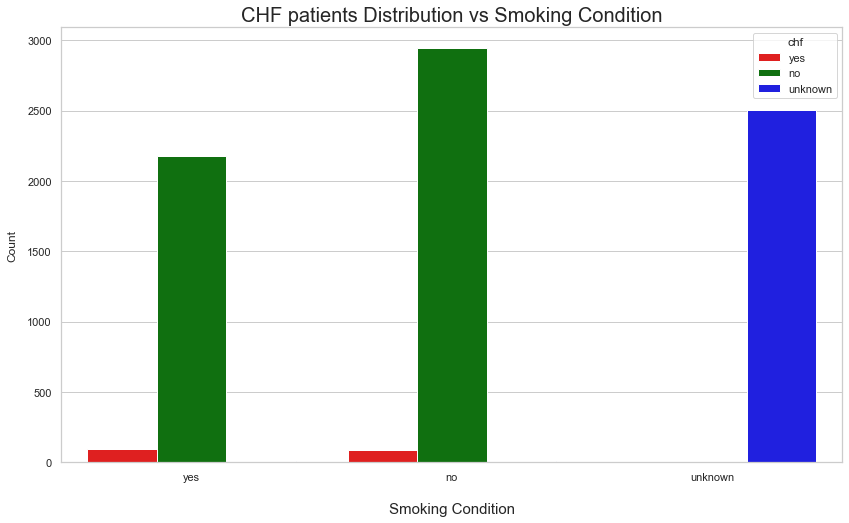

In [61]:
plt.figure(figsize=[14, 8])
sb.set_theme(style='whitegrid')

sb.countplot(data=df, x='smoker', hue='chf', palette=['red', 'green', 'blue'])

plt.xticks(rotation=0)
plt.title("CHF patients Distribution vs Smoking Condition", fontsize= 20)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Smoking Condition', fontsize=15, labelpad=20);

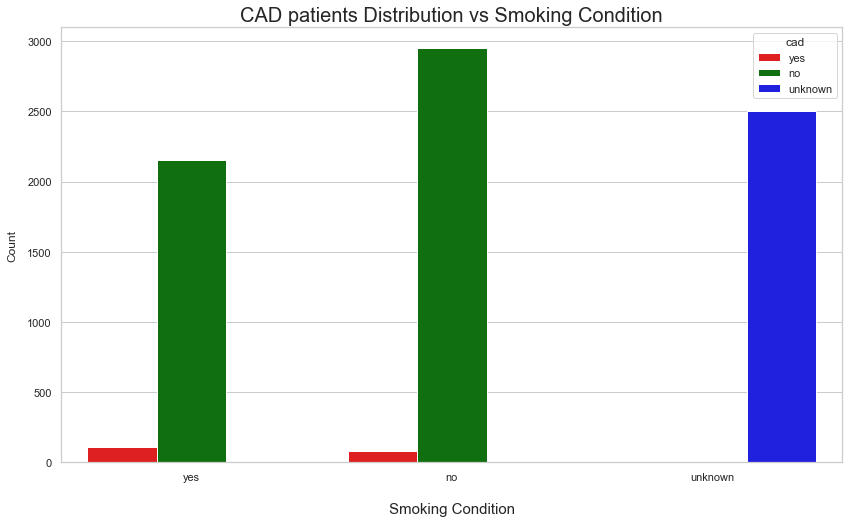

In [62]:
plt.figure(figsize=[14, 8])
sb.set_theme(style='whitegrid')

sb.countplot(data=df, x='smoker', hue='cad', palette=['red', 'green', 'blue'])

plt.xticks(rotation=0)
plt.title("CAD patients Distribution vs Smoking Condition", fontsize= 20)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Smoking Condition', fontsize=15, labelpad=20);

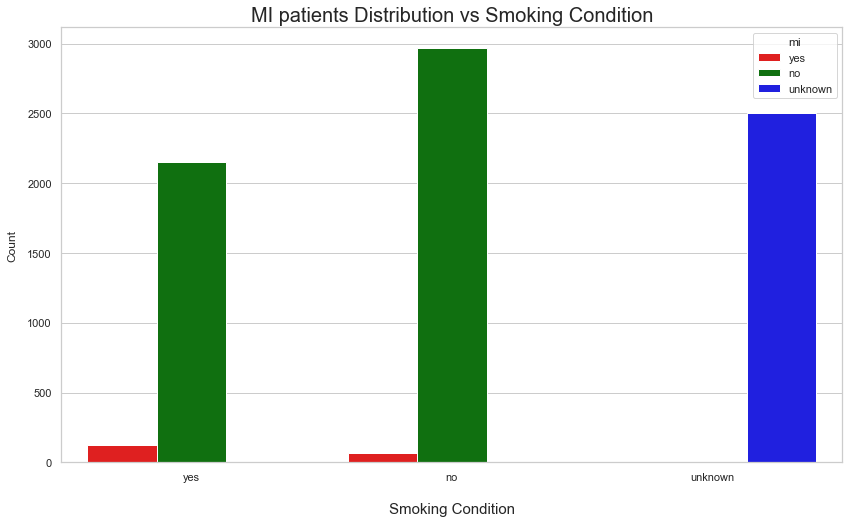

In [63]:
plt.figure(figsize=[14, 8])
sb.set_theme(style='whitegrid')

sb.countplot(data=df, x='smoker', hue='mi', palette=['red', 'green', 'blue'])

plt.xticks(rotation=0)
plt.title("MI patients Distribution vs Smoking Condition", fontsize= 20)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Smoking Condition', fontsize=15, labelpad=20);

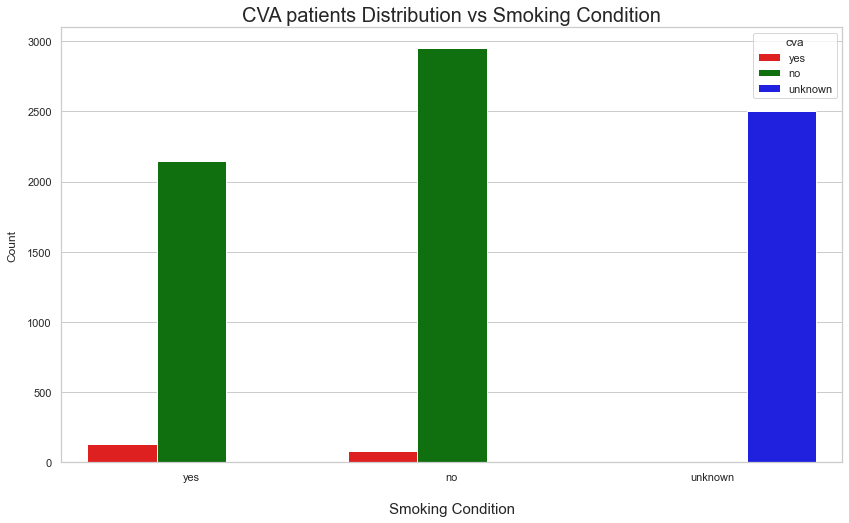

In [64]:
plt.figure(figsize=[14, 8])
sb.set_theme(style='whitegrid')

sb.countplot(data=df, x='smoker', hue='cva', palette=['red', 'green', 'blue'])

plt.xticks(rotation=0)
plt.title("CVA patients Distribution vs Smoking Condition", fontsize= 20)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Smoking Condition', fontsize=15, labelpad=20);

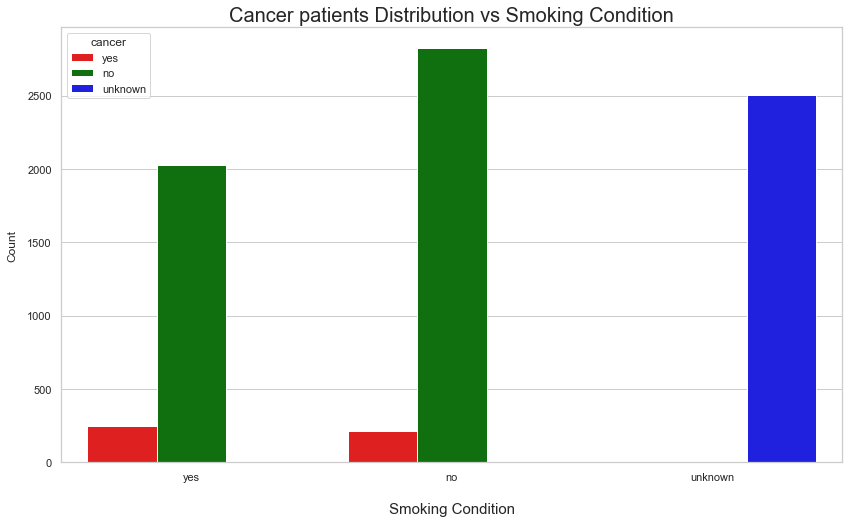

In [65]:
plt.figure(figsize=[14, 8])
sb.set_theme(style='whitegrid')

sb.countplot(data=df, x='smoker', hue='cancer', palette=['red', 'green', 'blue'])

plt.xticks(rotation=0)
plt.title("Cancer patients Distribution vs Smoking Condition", fontsize= 20)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Smoking Condition', fontsize=15, labelpad=20);

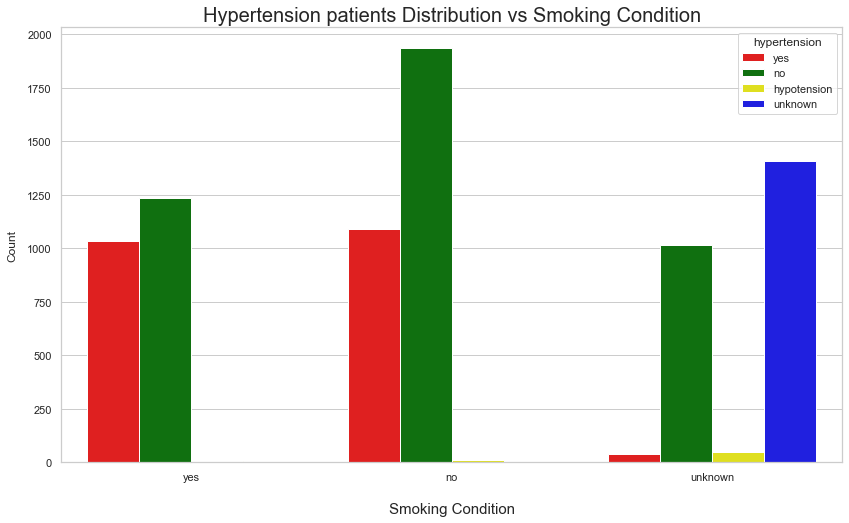

In [66]:
plt.figure(figsize=[14, 8])
sb.set_theme(style='whitegrid')

sb.countplot(data=df, x='smoker', hue='hypertension', palette=['red', 'green', 'yellow', 'blue'])

plt.xticks(rotation=0)
plt.title("Hypertension patients Distribution vs Smoking Condition", fontsize= 20)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Smoking Condition', fontsize=15, labelpad=20);

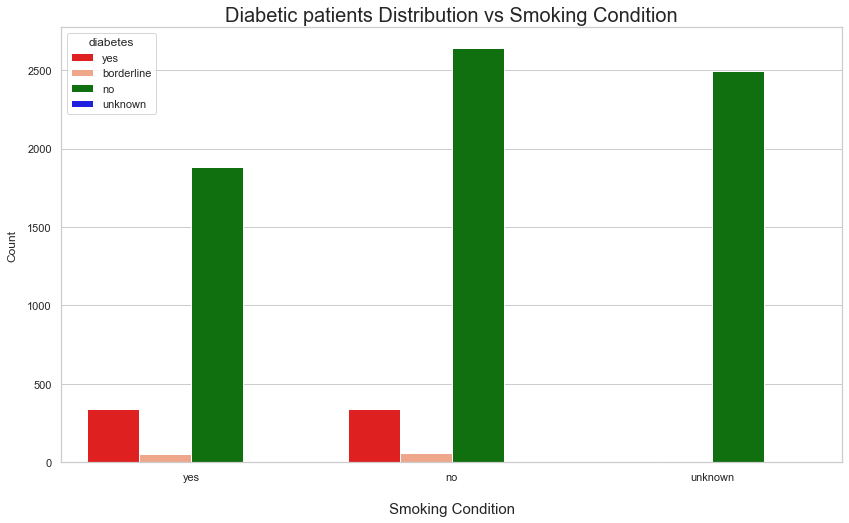

In [67]:
plt.figure(figsize=[14, 8])
sb.set_theme(style='whitegrid')

sb.countplot(data=df, x='smoker', hue='diabetes', palette=['red', 'lightsalmon', 'green', 'blue'])

plt.xticks(rotation=0)
plt.title("Diabetic patients Distribution vs Smoking Condition", fontsize= 20)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Smoking Condition', fontsize=15, labelpad=20);


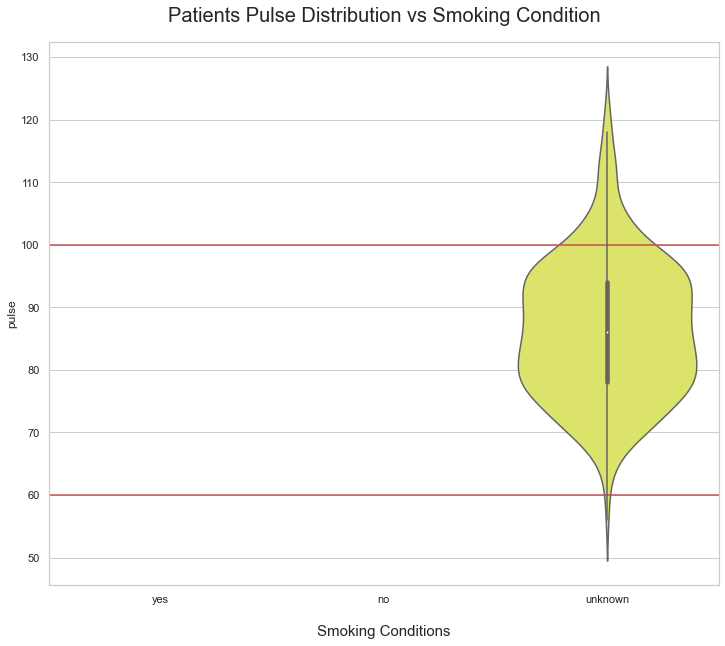

In [69]:
plt.figure(figsize=[12,10])
sb.set_theme(style='whitegrid')

plt.axhline(y=60, linestyle='-', linewidth=2, color='r', alpha=.75)
plt.axhline(y=100, linestyle='-', linewidth=2, color='r', alpha=.75)

sb.violinplot(data=df, x='smoker', y='pulse', color=sb.color_palette('Wistia', 10)[0])

plt.title('Patients Pulse Distribution vs Smoking Condition', fontsize=20, pad=20)
plt.xlabel('Smoking Conditions', fontsize=15, labelpad=20);

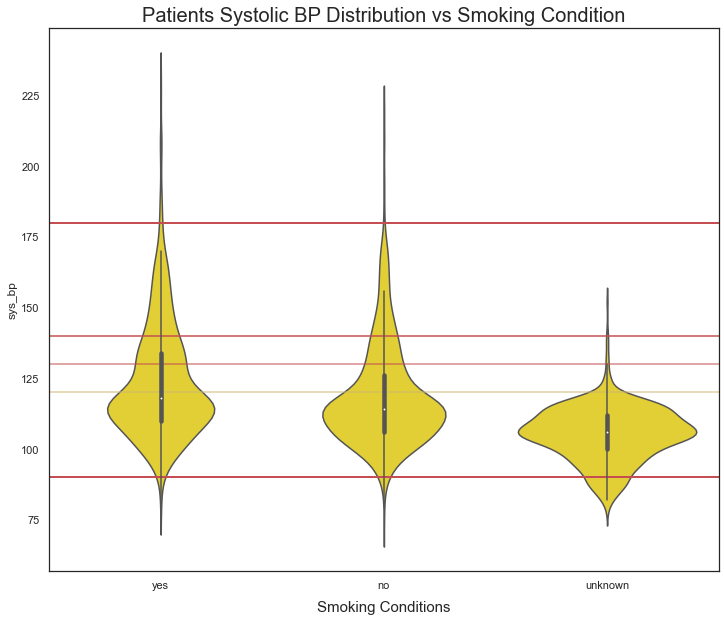

In [70]:
plt.figure(figsize=[12,10])
sb.set_theme(style='white')

plt.axhline(y=90, linestyle='-', linewidth=2, color='r', alpha=1)
plt.axhline(y=120, linestyle='-', linewidth=2, color='y', alpha=.5)
plt.axhline(y=130, linestyle='-', linewidth=2, color='r', alpha=.5)
plt.axhline(y=140, linestyle='-', linewidth=2, color='r', alpha=.75)
plt.axhline(y=180, linestyle='-', linewidth=2, color='r', alpha=1)

sb.violinplot(data=df, x='smoker', y='sys_bp', color=sb.color_palette('Wistia', 10)[2])

plt.title('Patients Systolic BP Distribution vs Smoking Condition', fontsize=20)
plt.xlabel('Smoking Conditions', fontsize=15, labelpad=10);

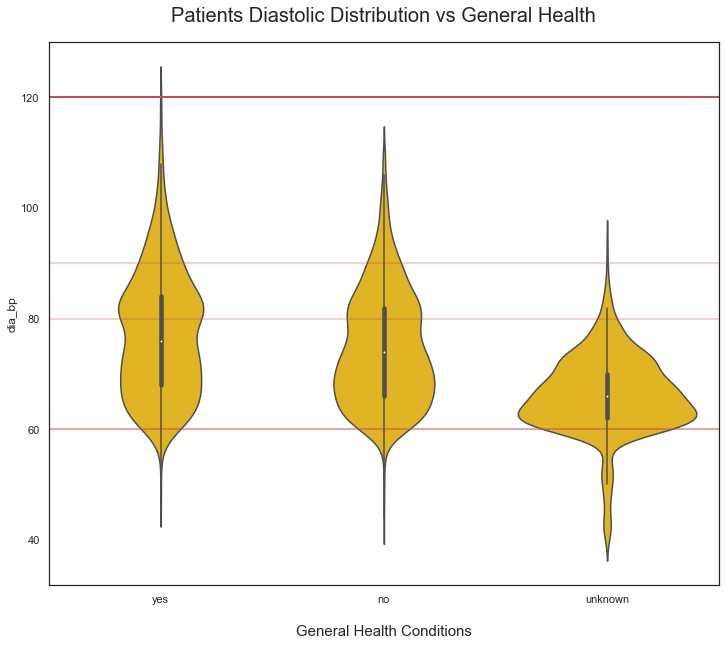

In [71]:
plt.figure(figsize=[12,10])
sb.set_theme(style='white')

plt.axhline(y=120, linestyle='-', linewidth=2, color='r', alpha=1)
plt.axhline(y=60, linestyle='-', linewidth=2, color='r', alpha=.5)
plt.axhline(y=80, linestyle='-', linewidth=2, color='r', alpha=.25)
plt.axhline(y=90, linestyle='-', linewidth=2, color='r', alpha=.25)

sb.violinplot(data=df, x='smoker', y='dia_bp', color=sb.color_palette('Wistia', 10)[4])

plt.title('Patients Diastolic Distribution vs General Health', fontsize=20, pad=20)
plt.xlabel('General Health Conditions', fontsize=15, labelpad=20);

### chf, cad, mi, diabetes, and waist circumference

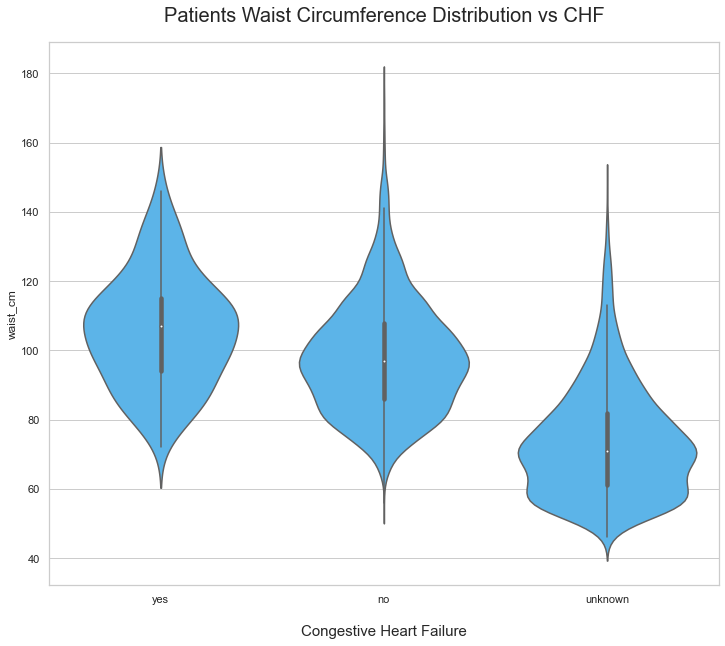

In [72]:
plt.figure(figsize=[12,10])
sb.set_theme(style='whitegrid')

sb.violinplot(data=df, x='chf', y='waist_cm', color=sb.color_palette('cool', 10)[2])

plt.title('Patients Waist Circumference Distribution vs CHF', fontsize=20, pad=20)
plt.xlabel('Congestive Heart Failure', fontsize=15, labelpad=20);

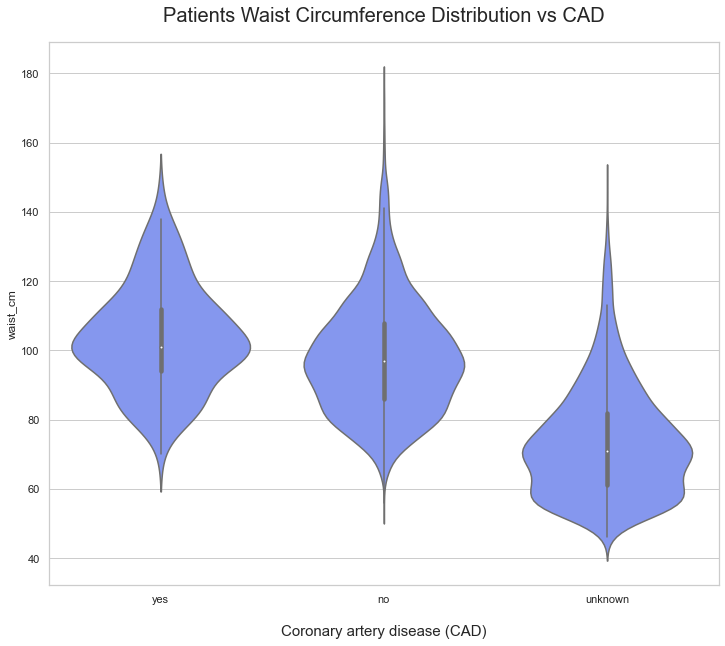

In [73]:
plt.figure(figsize=[12,10])
sb.set_theme(style='whitegrid')

sb.violinplot(data=df, x='cad', y='waist_cm', color=sb.color_palette('cool', 10)[4])

plt.title('Patients Waist Circumference Distribution vs CAD', fontsize=20, pad=20)
plt.xlabel('Coronary artery disease (CAD)', fontsize=15, labelpad=20);

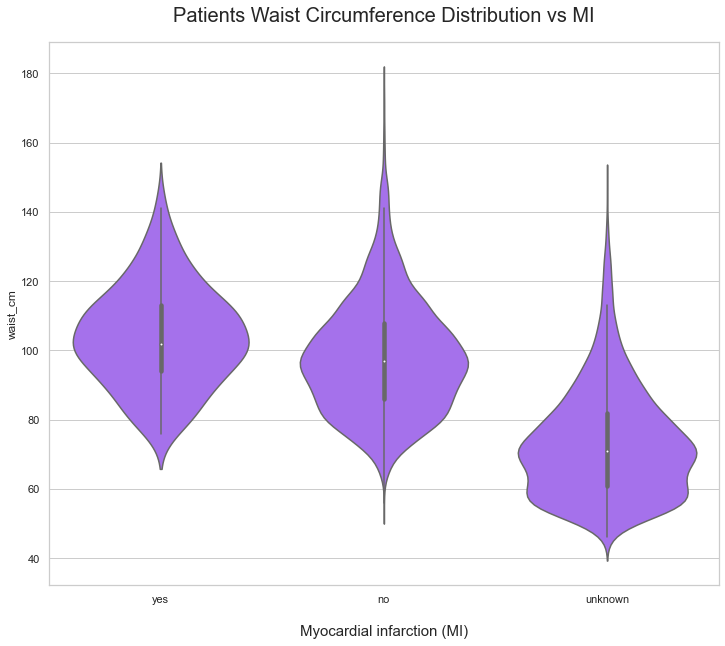

In [74]:
plt.figure(figsize=[12,10])
sb.set_theme(style='whitegrid')

sb.violinplot(data=df, x='mi', y='waist_cm', color=sb.color_palette('cool', 10)[6])

plt.title('Patients Waist Circumference Distribution vs MI', fontsize=20, pad=20)
plt.xlabel('Myocardial infarction (MI)', fontsize=15, labelpad=20);

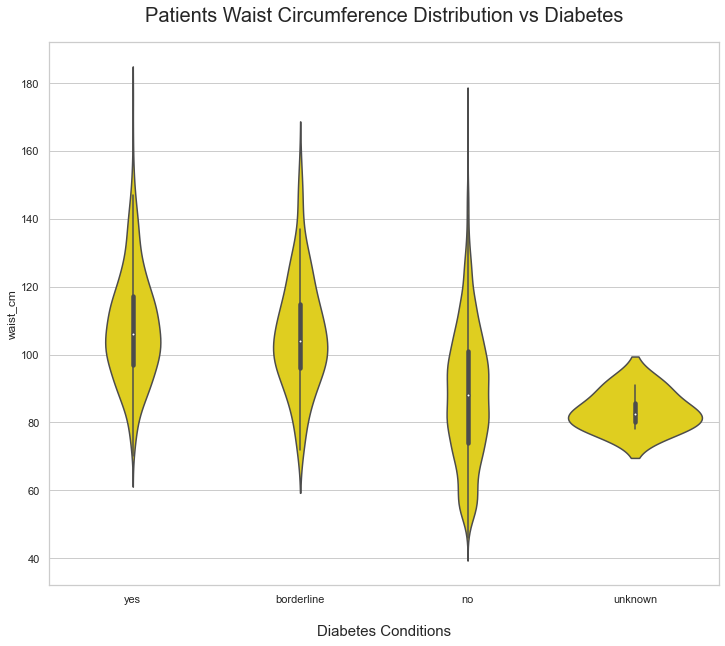

In [75]:
plt.figure(figsize=[12,10])
sb.set_theme(style='whitegrid')

sb.violinplot(data=df, x='diabetes', y='waist_cm', color=sb.color_palette('autumn_r', 10)[0])

plt.title('Patients Waist Circumference Distribution vs Diabetes', fontsize=20, pad=20)
plt.xlabel('Diabetes Conditions', fontsize=15, labelpad=20);

### weight and blood pressure

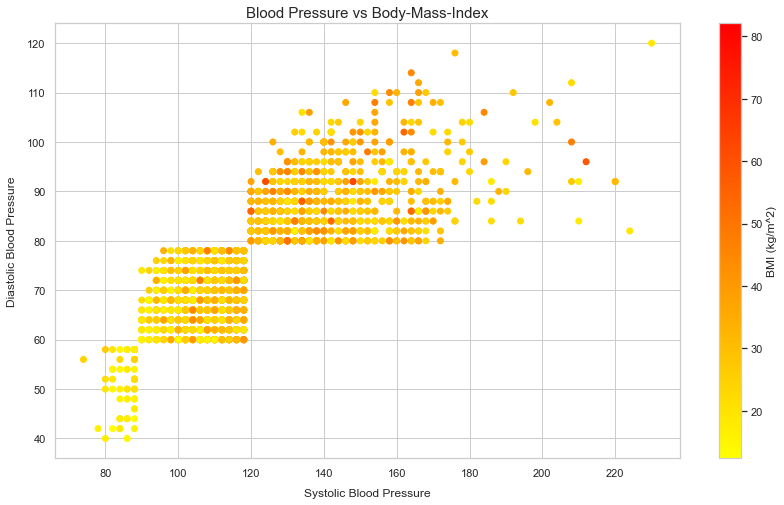

In [76]:
plt.figure(figsize=[14, 8])
plt.scatter(data=df, x='sys_bp', y='dia_bp', c='bmi', cmap='autumn_r', alpha=1)
plt.colorbar(label='BMI (kg/m^2)');

plt.title('Blood Pressure vs Body-Mass-Index', fontsize= 15)
plt.ylabel('Diastolic Blood Pressure', labelpad=10)
plt.xlabel('Systolic Blood Pressure', labelpad=10);

### bmi and hypertension for both genders

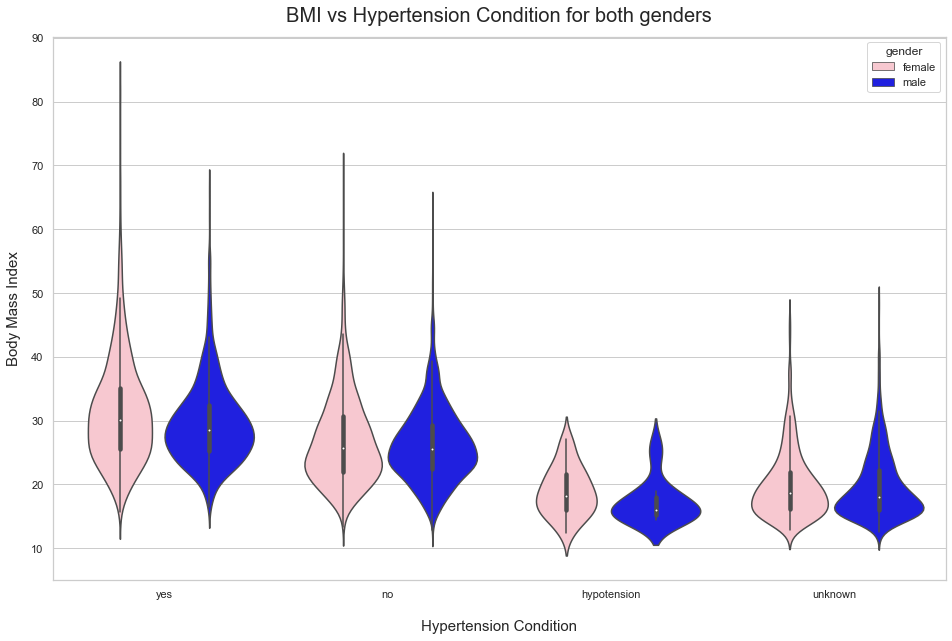

In [77]:
plt.figure(figsize=[16, 10])
sb.set_theme(style='whitegrid')

sb.violinplot(data=df, x='hypertension', y='bmi', hue='gender', hue_order=['female', 'male'], 
             palette=['pink', 'blue'], alpha=.5)

plt.title('BMI vs Hypertension Condition for both genders', fontsize= 20, pad=15)
plt.xlabel('Hypertension Condition', fontsize= 15, labelpad=20)
plt.ylabel('Body Mass Index', fontsize= 15, labelpad=10);